In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset

df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [3]:
# Prinitng all rows and columns 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# Printing Top Five Rows

df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3   
1         assistant manager     Indore      m 1989-10-04          85.4   
2          systems engineer    Chennai      f 1992-08-03          85.0   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6   
4                       get    Manesar      m 1991-02-27          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [5]:
# Printing the number of rows and columns 

df.shape

(3998, 39)

In [5]:
# Printing the description of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
# Printing the statistical description of the data

df.describe().T

count           mean            std         min  \
ID                     3998.0  663794.540520  363218.245829  11244.0000   
Salary                 3998.0  307699.849925  212737.499957  35000.0000   
10percentage           3998.0      77.925443       9.850162     43.0000   
12graduation           3998.0    2008.087544       1.653599   1995.0000   
12percentage           3998.0      74.466366      10.999933     40.0000   
CollegeID              3998.0    5156.851426    4802.261482      2.0000   
CollegeTier            3998.0       1.925713       0.262270      1.0000   
collegeGPA             3998.0      71.486171       8.167338      6.4500   
CollegeCityID          3998.0    5156.851426    4802.261482      2.0000   
CollegeCityTier        3998.0       0.300400       0.458489      0.0000   
GraduationYear         3998.0    2012.105803      31.857271      0.0000   
English                3998.0     501.649075     104.940021    180.0000   
Logical                3998.0     501.598799      86.783297    195.0000   
Quant                  3998.0     513.378189     122.302332    120.0000   
Domain                 3998.0       0.510490       0.468671     -1.0000   
ComputerProgramming    3998.0     353.102801     205.355519     -1.0000   
ElectronicsAndSemicon  3998.0      95.328414     158.241218     -1.0000   
ComputerScience        3998.0      90.742371     175.273083     -1.0000   
MechanicalEngg         3998.0      22.974737      98.123311     -1.0000   
ElectricalEngg         3998.0      16.478739      87.585634     -1.0000   
TelecomEngg            3998.0      31.851176     104.852845     -1.0000   
CivilEngg              3998.0       2.683842      36.658505     -1.0000   
conscientiousness      3998.0      -0.037831       1.028666     -4.1267   
agreeableness          3998.0       0.146496       0.941782     -5.7816   
extraversion           3998.0       0.002763       0.951471     -4.6009   
nueroticism            3998.0      -0.169033       1.007580     -2.6430   
openess_to_experience  3998.0      -0.138110       1.008075     -7.3757   

                                 25%            50%            75%  \
ID                     334284.250000  639600.000000  990480.000000   
Salary                 180000.000000  300000.000000  370000.000000   
10percentage               71.680000      79.150000      85.670000   
12graduation             2007.000000    2008.000000    2009.000000   
12percentage               66.000000      74.400000      82.600000   
CollegeID                 494.000000    3879.000000    8818.000000   
CollegeTier                 2.000000       2.000000       2.000000   
collegeGPA                 66.407500      71.720000      76.327500   
CollegeCityID             494.000000    3879.000000    8818.000000   
CollegeCityTier             0.000000       0.000000       1.000000   
GraduationYear           2012.000000    2013.000000    2014.000000   
English                   425.000000     500.000000     570.000000   
Logical                   445.000000     505.000000     565.000000   
Quant                     430.000000     515.000000     595.000000   
Domain                      0.342315       0.622643       0.842248   
ComputerProgramming       295.000000     415.000000     495.000000   
ElectronicsAndSemicon      -1.000000      -1.000000     233.000000   
ComputerScience            -1.000000      -1.000000      -1.000000   
MechanicalEngg             -1.000000      -1.000000      -1.000000   
ElectricalEngg             -1.000000      -1.000000      -1.000000   
TelecomEngg                -1.000000      -1.000000      -1.000000   
CivilEngg                  -1.000000      -1.000000      -1.000000   
conscientiousness          -0.713525       0.046400       0.702700   
agreeableness              -0.287100       0.212400       0.812800   
extraversion               -0.604800       0.091400       0.672000   
nueroticism                -0.868200      -0.234400       0.526200   
openess_to_experience      -0.669

In [7]:
# Printing the Null values of the dataset

df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [8]:
# Printing the duplicated values of the datset 

df.duplicated().sum()

0

In [9]:
# Printing the columns name

df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [10]:
# Droping unnessary columns 

df.drop(columns=['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID'], inplace=True)

In [11]:
df.head()

Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01              present   senior quality engineer   
1   500000 2013-09-01              present         assistant manager   
2   325000 2014-06-01              present          systems engineer   
3  1100000 2011-07-01              present  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   12graduation  12percentage                             12board  \
0          2007          95.8  board of intermediate education,ap   
1          2007          85.0                                cbse   
2          2010          68.2                                cbse   
3          2007          83.6                                cbse   
4          2008          76.8                                cbse   

   CollegeTier       Degree                             Specialization  \
0            2  B.Tech/B.E.                       computer engineering   
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  CollegeCityTier    CollegeState  GraduationYear  English  \
0       78.00                0  Andhra Pradesh            2011      515   
1       70.06                0  Madhya Pradesh            2012      695   
2       70.00                0   Uttar Pradesh            2014      615   
3       74.64                1           Delhi            2011      635   
4       73.90                0   Uttar Pradesh            2012      545   

   Logical  Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
0      585    525  0.635979                  445                     -1   
1      610    780  0.960603                   -1                    466   
2      545    370  0.450877                  395                     -1   
3      585    625  0.974396                  615                     -1   
4      625    465  0.124502                   -1                    233   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295

### Salary Column

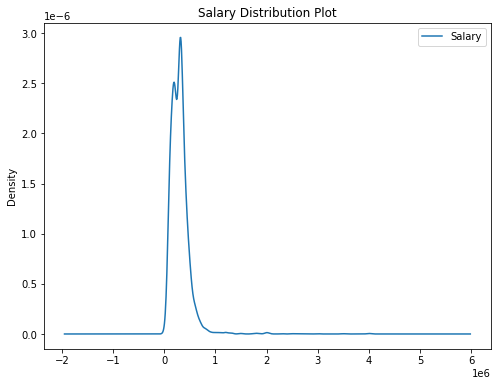

In [12]:
# Visualizing Salary columns Distribution

df.Salary.plot(kind='kde',title='Salary Distribution Plot', figsize= (8,6), legend=True )
plt.show()

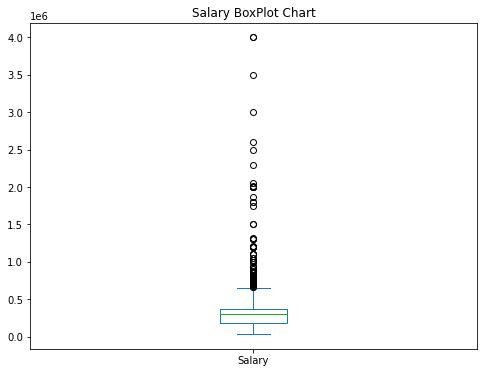

In [13]:
# Visualizing Salary columns BoxPlot Chart

df.Salary.plot(kind='box',title='Salary BoxPlot Chart', figsize= (8,6), legend=True )
plt.show()

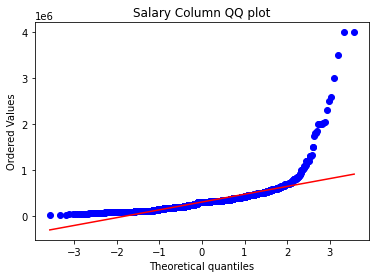

In [14]:
data=df.Salary

# Create QQ plot
fig, ax = plt.subplots()
stats.probplot(data, plot=ax)

# Set plot labels
ax.set_title("Salary Column QQ plot")
plt.show()

In [15]:
print("Minimum Salaries : ", df.Salary.min())
print("Maximum Salaries : ", df.Salary.max())
print("Mean Salaries : ", round(df.Salary.mean()))
print("Median Salaries : ", round(df.Salary.median()))
print("Standard Salaries Values : ", round(df.Salary.std()))

Minimum Salaries :  35000
Maximum Salaries :  4000000
Mean Salaries :  307700
Median Salaries :  300000
Standard Salaries Values :  212737


In [16]:
print("25 Percentile  : ",round(df.Salary.quantile(0.25)))
print("50 Percentile  : ",round(df.Salary.quantile(0.50)))
print("60 Percentile  : ",round(df.Salary.quantile(0.60)))
print("75 Percentile  : ",round(df.Salary.quantile(0.75)))
print("80 Percentile  : ",round(df.Salary.quantile(0.80)))
print("90 Percentile  : ",round(df.Salary.quantile(0.90)))

25 Percentile  :  180000
50 Percentile  :  300000
60 Percentile  :  325000
75 Percentile  :  370000
80 Percentile  :  400000
90 Percentile  :  480000


**Salary Column Observations**

- Salary Columns have too many Outlier
- Salary Columns must be treated if we give to ML Algos 

### (Date of Joining) DOJ Column

In [17]:
# Fetching years data from DOJ Column

YOJ = df.DOJ.dt.year
YOJ.value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: DOJ, dtype: int64

In [18]:
YOJ = YOJ.replace(1991,2010)
YOJ = YOJ.replace(2006,2010)
YOJ = YOJ.replace(2008,2010)
YOJ = YOJ.replace(2004,2010)
YOJ = YOJ.replace(2007,2010)
YOJ = YOJ.replace(2009,2010)

In [19]:
YOJ.value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     179
Name: DOJ, dtype: int64

In [20]:
df['YOJ'] = YOJ

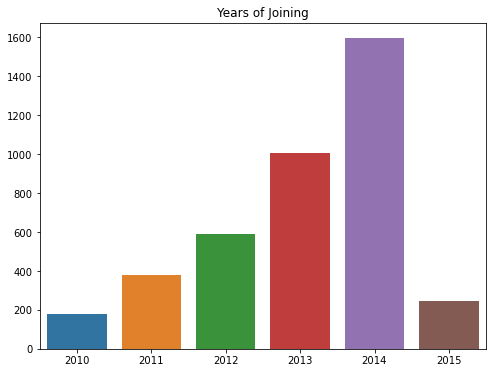

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x=YOJ)
plt.title("Years of Joining")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [22]:
# Fetching Months data from DOJ Column

MOJ = df.DOJ.dt.month_name()
MOJ.value_counts()

July         488
August       451
June         390
January      372
September    358
October      332
March        303
February     297
December     290
November     273
April        238
May          206
Name: DOJ, dtype: int64

In [23]:
df['MOJ'] = MOJ

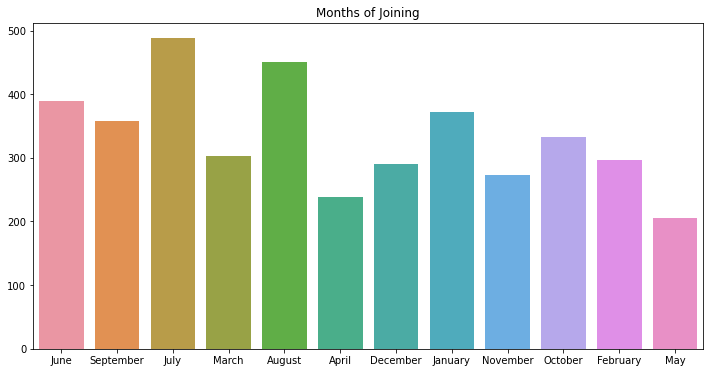

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x=MOJ)
plt.title("Months of Joining")
plt.xlabel("")
plt.ylabel("")
plt.show()

**DOJ Column Observations**

- DOJ Column need Feature Engineering for more insights
- Most of the People Join in Year 2014
- July is the Peak month of Joining

### (Date of Leaving) DOL Column

In [25]:
df.DOL

0                   present
1                   present
2                   present
3                   present
4       2015-03-01 00:00:00
5                   present
6       2015-05-01 00:00:00
7       2015-07-01 00:00:00
8                   present
9                   present
10      2015-04-01 00:00:00
11      2014-10-01 00:00:00
12                  present
13                  present
14                  present
15                  present
16                  present
17      2014-09-01 00:00:00
18      2014-06-01 00:00:00
19                  present
20      2012-09-01 00:00:00
21      2013-12-01 00:00:00
22      2015-04-01 00:00:00
23      2015-04-01 00:00:00
24      2015-06-01 00:00:00
25                  present
26      2013-10-01 00:00:00
27      2015-01-01 00:00:00
28      2015-04-01 00:00:00
29      2014-04-01 00:00:00
30                  present
31      2015-04-01 00:00:00
32                  present
33                  present
34                  present
35                  

In [26]:
DOL = df.DOL.replace('present',2015)

In [27]:
DOL = pd.to_datetime(DOL, errors='coerce')

In [28]:
DOL = DOL.dt.year
DOL

0          NaN
1          NaN
2          NaN
3          NaN
4       2015.0
5          NaN
6       2015.0
7       2015.0
8          NaN
9          NaN
10      2015.0
11      2014.0
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17      2014.0
18      2014.0
19         NaN
20      2012.0
21      2013.0
22      2015.0
23      2015.0
24      2015.0
25         NaN
26      2013.0
27      2015.0
28      2015.0
29      2014.0
30         NaN
31      2015.0
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37      2015.0
38         NaN
39      2013.0
40      2012.0
41      2014.0
42         NaN
43      2015.0
44      2015.0
45      2015.0
46      2015.0
47      2013.0
48         NaN
49      2014.0
50      2013.0
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN
56         NaN
57         NaN
58      2014.0
59      2013.0
60         NaN
61      2015.0
62         NaN
63      2015.0
64      2012.0
65      2014.0
66      20

In [29]:
DOL = DOL.fillna(2015)
YOL = DOL.astype('int32')
YOL.value_counts()

2015    2934
2014     646
2013     255
2012     116
2011      40
2010       4
2005       1
2009       1
2008       1
Name: DOL, dtype: int64

In [30]:
df['YOL'] = YOL

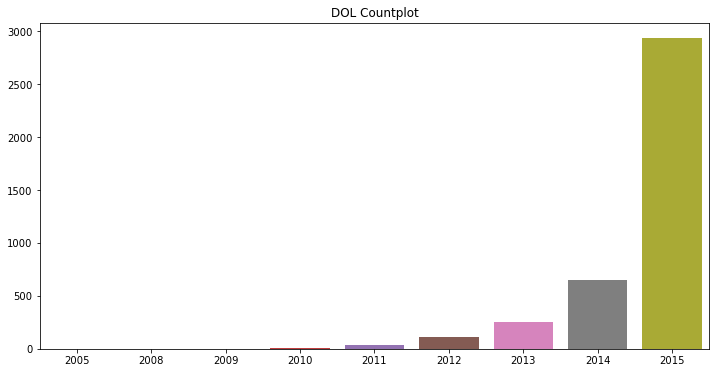

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x=YOL)
plt.title("DOL Countplot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**(Date of Leaving) DOL Column Observations**

- DOL Column need Feature Engineering for more insights
- Most of the People Leave in Year 2015

### Designation Column

In [32]:
df.Designation.value_counts()

software engineer                         539
software developer                        265
system engineer                           205
programmer analyst                        139
systems engineer                          118
java software engineer                    111
software test engineer                    100
project engineer                           77
technical support engineer                 76
senior software engineer                   72
java developer                             67
test engineer                              57
web developer                              54
application developer                      52
assistant manager                          52
network engineer                           51
data analyst                               49
business analyst                           49
engineer                                   47
android developer                          46
associate software engineer                46
programmer                        

In [33]:
l=[]
for i in df['Designation']:
    if ('senior' in i and 'engineer' not in i):
        l.append('senior')
    elif('trainee'in i and 'engineer' not in i):
        l.append('trainee')
    elif('engineer' in i and 'senior' not in i):
        l.append('engineer')
    elif('associate' in i and 'senior' not in i):
        l.append('associate')
    elif('developer' in i and 'senior' not in i):
        l.append('developer')
    elif('manager' in i and 'senior' not in i):
        l.append('manager')
    elif('analyst' in i):
        l.append('analyst')
    elif('consultant' in i):
        l.append('consultant')
    elif('executive' in i):
        l.append('executive')
    elif('designer' in i):
        l.append('designer')
    else:
        l.append('others')

In [34]:
df['Designation']=l

In [35]:
df['Designation'].value_counts()

engineer      1997
developer      668
others         538
analyst        402
manager        123
associate       66
executive       62
trainee         57
senior          43
designer        23
consultant      19
Name: Designation, dtype: int64

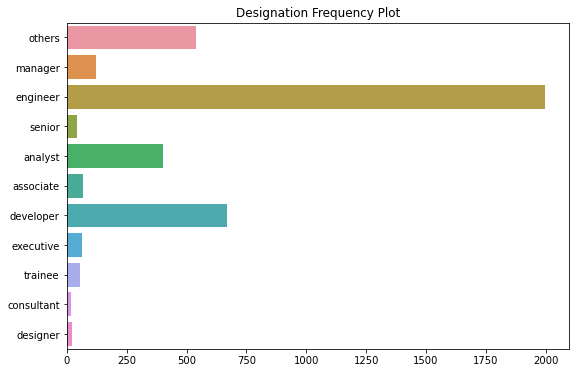

In [36]:
plt.figure(figsize=(9,6))
sns.countplot(y = df['Designation'])
plt.title("Designation Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**Designation Column Observations**

- Designation need feature engineering for more insights
- Engineer Designation are more in compare to Other

### JobCity Column

In [37]:
df.JobCity.value_counts()

Bangalore                                 627
-1                                        461
Noida                                     368
Hyderabad                                 335
Pune                                      290
Chennai                                   272
Gurgaon                                   198
New Delhi                                 196
Mumbai                                    108
Kolkata                                    98
Jaipur                                     46
Lucknow                                    36
Mysore                                     36
Navi Mumbai                                32
chennai                                    27
Chandigarh                                 26
pune                                       26
Greater Noida                              26
Indore                                     24
Bhubaneswar                                22
Coimbatore                                 20
Faridabad                         

In [38]:
df.JobCity = df.JobCity.str.replace('banglore','bangalore')
df.JobCity = df.JobCity.str.replace('delhi','new delhi')
df.JobCity = df.JobCity.str.replace('new dehli','new delhi')
df.JobCity = df.JobCity.str.replace('new delhi/ncr','new delhi')
df.JobCity = df.JobCity.str.replace('ncr','new delhi')
df.JobCity = df.JobCity.str.replace('navi mumbai','mumbai')
df.JobCity = df.JobCity.str.replace('mumbai , hyderabad','mumbai')
df.JobCity = df.JobCity.str.replace('new new delhi','new delhi')
df.JobCity = df.JobCity.str.replace('asifabadbangalore','bangalore')
df.JobCity = df.JobCity.str.replace('bengaluru','bangalore')
df.JobCity = df.JobCity.str.replace('greater noida','noida')
df.JobCity = df.JobCity.str.replace('nouda','noida')
df.JobCity = df.JobCity.str.replace('banagalore','bangalore')
df.JobCity = df.JobCity.str.replace('banaglore','bangalore')
df.JobCity = df.JobCity.str.replace('a-64,sec-64,noida','noida')
df.JobCity = df.JobCity.str.replace('technopark, trivandrum','trivandrum')
df.JobCity = df.JobCity.str.replace('vizag','visakhapatnam')
df.JobCity = df.JobCity.str.replace('vsakhapttnam','visakhapatnam')
df.JobCity = df.JobCity.str.replace('thiruvananthapuram','trivandrum')
df.JobCity = df.JobCity.str.replace('ambala city','ambala')
df.JobCity = df.JobCity.str.replace('kudankulam ,tarapur','kundankulam')
df.JobCity = df.JobCity.str.replace('gaziabaad','ghaziabad')
df.JobCity = df.JobCity.str.replace('gajiabaad','ghaziabad')
df.JobCity = df.JobCity.str.replace('bhubaneswar','bhubaneshwar')
df.JobCity = df.JobCity.str.replace('bhubneshwar','bhubaneshwar')
df.JobCity = df.JobCity.str.replace('guragaon','gurgaon')
df.JobCity = df.JobCity.str.replace('gurgoan','gurgaon')
df.JobCity = df.JobCity.str.replace('kolkata`','kolkata')
df.JobCity = df.JobCity.str.replace('sonepat','sonipat')
df.JobCity = df.JobCity.str.replace('baroda','vadodara')
df.JobCity = df.JobCity.str.replace('hderabad','hyderabad')
df.JobCity = df.JobCity.str.replace('pondi','pondy')
df.JobCity = df.JobCity.str.replace('punchkula','panchkula')
df.JobCity = df.JobCity.str.replace('muzzafarpur','muzaffarpur')
df.JobCity = df.JobCity.str.replace('kochi/cochin, chennai and coimbatore','kochi/cochin')
df.JobCity = df.JobCity.str.replace('nasikcity','nashik')
df.JobCity = df.JobCity.str.replace('sahibabad','shahibabad')
df.JobCity = df.JobCity.str.replace('punr','pune')
df.JobCity = df.JobCity.str.replace('tirupati','tirupathi')
df.JobCity = df.JobCity.str.replace('sadulpur,rajgarh,distt-churu,rajasthan','sadulpur')

df.JobCity = df.JobCity.str.replace('bangalore','bangalore')
df.JobCity = df.JobCity.str.replace('BAngalore','bangalore')
df.JobCity = df.JobCity.str.replace('Banglore','bangalore')
df.JobCity = df.JobCity.str.replace('BANGLORE','bangalore')
df.JobCity = df.JobCity.str.replace(' bangalore','bangalore')
df.JobCity = df.JobCity.str.replace('bangalore','bangalore')
df.JobCity = df.JobCity.str.replace('banagalore','bangalore')
df.JobCity = df.JobCity.str.replace('banaglore','bangalore')
df.JobCity = df.JobCity.str.replace('bangalore ','bangalore')
df.JobCity = df.JobCity.str.replace('BANGALORE','bangalore')
df.JobCity = df.JobCity.str.replace('Banagalore','bangalore')
df.JobCity = df.JobCity.str.replace( 'Bengaluru','bangalore') 
df.JobCity = df.JobCity.str.replace(  'Chennai, bangalore','bangalore')
df.JobCity = df.JobCity.str.replace(  'bangalore ','bangalore')
df.JobCity = df.JobCity.str.replace(  'Asifabadbangalore','bangalore')
df.JobCity = df.JobCity.str.replace(  'banaglore'  ,'bangalore')
df.JobCity = df.JobCity.str.replace('chennai,bangalore','bangalore')

df.JobCity = df.JobCity.str.replace( ' chennai'  ,'chennai')
df.JobCity = df.JobCity.str.replace(  'kochi/cochin,chennai and coimbatore' ,'chennai')
df.JobCity = df.JobCity.str.replace( 'chennai '  ,'chennai')
df.JobCity = df.JobCity.str.replace(  'chennai & mumbai' ,'chennai')
df.JobCity = df.JobCity.str.replace(  'chennai& mumbai' ,'chennai')

df.JobCity = df.JobCity.str.replace('Navi Mumbai','mumbai')
df.JobCity = df.JobCity.str.replace('mumbai , hyderabad','mumbai')
df.JobCity = df.JobCity.str.replace('THANE','mumbai')
df.JobCity = df.JobCity.str.replace('Thane','mumbai')
df.JobCity = df.JobCity.str.replace('Mumbai','mumbai')
df.JobCity = df.JobCity.str.replace('MUMBAI','mumbai')
df.JobCity = df.JobCity.str.replace(' mumbai','mumbai')
df.JobCity = df.JobCity.str.replace('NAVI MUMBAI','mumbai')
df.JobCity = df.JobCity.str.replace('Navi Mumbai , Hyderabad','mumbai')
df.JobCity = df.JobCity.str.replace('thane','mumbai')
df.JobCity = df.JobCity.str.replace('Khopoli','mumbai')
df.JobCity = df.JobCity.str.replace('Navi mumbai','mumbai')
df.JobCity = df.JobCity.str.replace(' Mumbai','mumbai')
df.JobCity = df.JobCity.str.replace(' Mumbai','mumbai')
df.JobCity = df.JobCity.str.replace('mumbai ','mumbai')
df.JobCity = df.JobCity.str.replace('Navimumbai','mumbai')
df.JobCity = df.JobCity.str.replace('mumbai , Hyderabad','mumbai')

df.JobCity = df.JobCity.str.replace('hyderabad(bhadurpally)','hyderabad')
df.JobCity = df.JobCity.str.replace('hderabad','hyderabad')
df.JobCity = df.JobCity.str.replace('Hyderabad ','hyderabad')
df.JobCity = df.JobCity.str.replace( 'navi mumbai , hyderabad','hyderabad')
df.JobCity = df.JobCity.str.replace('hyderabad ' ,'hyderabad')
df.JobCity = df.JobCity.str.replace('delhi','new delhi')
df.JobCity = df.JobCity.str.replace('new dehli','new delhi')
df.JobCity = df.JobCity.str.replace('new delhi/ncr','new delhi')
df.JobCity = df.JobCity.str.replace('ncr','new delhi')
df.JobCity = df.JobCity.str.replace('new new delhi','new delhi')
df.JobCity = df.JobCity.str.replace('greater noida','new delhi')
df.JobCity = df.JobCity.str.replace('nouda','new delhi')
df.JobCity = df.JobCity.str.replace('a-64,sec-64,noida','new delhi')
df.JobCity = df.JobCity.str.replace('noida','new delhi')
df.JobCity = df.JobCity.str.replace('noida','new delhi')
df.JobCity = df.JobCity.str.replace('gaziabaad','new delhi')
df.JobCity = df.JobCity.str.replace('gajiabaad','new delhi')
df.JobCity = df.JobCity.str.replace('ghaziabad','new delhi')
df.JobCity = df.JobCity.str.replace('guragaon','new delhi')
df.JobCity = df.JobCity.str.replace('gurgoan','new delhi')
df.JobCity = df.JobCity.str.replace('gurgaon','new delhi')
df.JobCity = df.JobCity.str.replace('new delhi - jaisalmer','new delhi')
df.JobCity = df.JobCity.str.replace('new delhi ','new delhi')
df.JobCity = df.JobCity.str.replace(' new delhi','new delhi')

df.JobCity = df.JobCity.str.replace('kolkata ','kolkata')
df.JobCity = df.JobCity.str.replace('maharajganj','north zone')

df.JobCity = df.JobCity.str.replace( 'rewari','north zone')
df.JobCity = df.JobCity.str.replace('panchkula','north zone')
df.JobCity = df.JobCity.str.replace('lucknow','north zone')
df.JobCity = df.JobCity.str.replace('una','north zone')
df.JobCity = df.JobCity.str.replace('kanpur ','north zone')
df.JobCity = df.JobCity.str.replace('faridabad','north zone')
df.JobCity = df.JobCity.str.replace('haridwar','north zone')
df.JobCity = df.JobCity.str.replace( 'unnao','north zone')
df.JobCity = df.JobCity.str.replace('dehradun','north zone')
df.JobCity = df.JobCity.str.replace('rudrapur','north zone')
df.JobCity = df.JobCity.str.replace('dharamshala','north zone')
df.JobCity = df.JobCity.str.replace('hissar','north zone')
df.JobCity = df.JobCity.str.replace('gurga','north zone')
df.JobCity = df.JobCity.str.replace('chandigarh','north zone')
df.JobCity = df.JobCity.str.replace('pantnagar','north zone')
df.JobCity = df.JobCity.str.replace( 'lucknow ','north zone')
df.JobCity = df.JobCity.str.replace('ludhiana','north zone')
df.JobCity = df.JobCity.str.replace( 'muzaffarnagar','north zone')
df.JobCity = df.JobCity.str.replace('gagret','north zone')
df.JobCity = df.JobCity.str.replace('indirapuram,new delhi','north zone')
df.JobCity = df.JobCity.str.replace('bareli','north zone')
df.JobCity = df.JobCity.str.replace('kanpur','north zone')
df.JobCity = df.JobCity.str.replace('dharuhera','north zone')
df.JobCity = df.JobCity.str.replace('meerut','north zone')
df.JobCity = df.JobCity.str.replace('agra','north zone')
df.JobCity = df.JobCity.str.replace('rohtak','north zone')
df.JobCity = df.JobCity.str.replace('jaspur','north zone')
df.JobCity = df.JobCity.str.replace('shimla','north zone')
df.JobCity = df.JobCity.str.replace('jammu','north zone')
df.JobCity = df.JobCity.str.replace( 'jhajjar','north zone')
df.JobCity = df.JobCity.str.replace('nalagarh','north zone')
df.JobCity = df.JobCity.str.replace( 'chandigarh ','north zone')
df.JobCity = df.JobCity.str.replace('joshimath','north zone')
df.JobCity = df.JobCity.str.replace('bathinda','north zone')
df.JobCity = df.JobCity.str.replace('kala amb ','north zone')
df.JobCity = df.JobCity.str.replace('karnal','north zone')
df.JobCity = df.JobCity.str.replace('baddi hp','north zone')
df.JobCity = df.JobCity.str.replace('bahadurgarh','north zone')
df.JobCity = df.JobCity.str.replace('varanasi','north zone')
df.JobCity = df.JobCity.str.replace( 'shahibabad','north zone')
df.JobCity = df.JobCity.str.replace('ambala','north zone')
df.JobCity = df.JobCity.str.replace( 'roorkee','north zone')
df.JobCity = df.JobCity.str.replace('allahabad','north zone')
df.JobCity = df.JobCity.str.replace('panchkula ','north zone')
df.JobCity = df.JobCity.str.replace('jalandhar','north zone')
df.JobCity = df.JobCity.str.replace('phagwara','north zone')
df.JobCity = df.JobCity.str.replace('yamuna nagar','north zone')
df.JobCity = df.JobCity.str.replace('sampla','north zone')
df.JobCity = df.JobCity.str.replace('mainpuri','north zone')
df.JobCity = df.JobCity.str.replace('rae bareli','north zone')
df.JobCity = df.JobCity.str.replace( 'patiala','north zone')
df.JobCity = df.JobCity.str.replace('gorakhpur','north zone')
df.JobCity = df.JobCity.str.replace( 'rajpura','north zone')
df.JobCity = df.JobCity.str.replace( 'haryana','north zone')
df.JobCity = df.JobCity.str.replace( 'haryana','north zone')

df.JobCity = df.JobCity.str.replace('kolkata ','kolkata')
df.JobCity = df.JobCity.str.replace('bhubaneshwar','east zone')
df.JobCity = df.JobCity.str.replace('dhanbad','east zone')
df.JobCity = df.JobCity.str.replace('bhagalpur','east zone')
df.JobCity = df.JobCity.str.replace('bankura','east zone')
df.JobCity = df.JobCity.str.replace('siliguri ','east zone')
df.JobCity = df.JobCity.str.replace('jamshedpur','east zone')
df.JobCity = df.JobCity.str.replace('ranchi','east zone')
df.JobCity = df.JobCity.str.replace('siliguri','east zone')
df.JobCity = df.JobCity.str.replace('angul','east zone')
df.JobCity = df.JobCity.str.replace('jowai','east zone')
df.JobCity = df.JobCity.str.replace('siliguri ','east zone')
df.JobCity = df.JobCity.str.replace('ganjam','east zone')
df.JobCity = df.JobCity.str.replace('chandrapur','east zone')
df.JobCity = df.JobCity.str.replace('patna','east zone')
df.JobCity = df.JobCity.str.replace('jaspur','east zone')
df.JobCity = df.JobCity.str.replace('burdwan','east zone')
df.JobCity = df.JobCity.str.replace('east zone ','east zone')
df.JobCity = df.JobCity.str.replace('nagari','east zone')
df.JobCity = df.JobCity.str.replace('orissa','east zone')
df.JobCity = df.JobCity.str.replace('durgapur','east zone')
df.JobCity = df.JobCity.str.replace('rayagada, odisha','east zone')
df.JobCity = df.JobCity.str.replace('howrah','east zone')
df.JobCity = df.JobCity.str.replace('bihar','east zone')
df.JobCity = df.JobCity.str.replace('baripada','east zone')
df.JobCity = df.JobCity.str.replace('guwahati','east zone')
df.JobCity = df.JobCity.str.replace('rourkela','east zone')
df.JobCity = df.JobCity.str.replace('haldia','east zone')

df.JobCity = df.JobCity.str.replace('mangalore','south zone')
df.JobCity = df.JobCity.str.replace('mysore','south zone')
df.JobCity = df.JobCity.str.replace('trivandrum' ,'south zone')
df.JobCity = df.JobCity.str.replace('coimbatore' ,'south zone')
df.JobCity = df.JobCity.str.replace('visakhapatnam','south zone')
df.JobCity = df.JobCity.str.replace('kochi/cochin','south zone')
df.JobCity = df.JobCity.str.replace('mysore ','south zone')
df.JobCity = df.JobCity.str.replace('kochi','south zone')
df.JobCity = df.JobCity.str.replace('tirupathi' ,'south zone')
df.JobCity = df.JobCity.str.replace('tirunelvelli' ,'south zone')
df.JobCity = df.JobCity.str.replace('tornagallu' ,'south zone')
df.JobCity = df.JobCity.str.replace('madurai' ,'south zone')
df.JobCity = df.JobCity.str.replace('cheyyar','south zone')
df.JobCity = df.JobCity.str.replace(' ariyalur' ,'south zone')
df.JobCity = df.JobCity.str.replace('calicut','south zone')
df.JobCity = df.JobCity.str.replace('miryalaguda','south zone')
df.JobCity = df.JobCity.str.replace('trichy','south zone')
df.JobCity = df.JobCity.str.replace('kundankulam','south zone')
df.JobCity = df.JobCity.str.replace('ongole','south zone')
df.JobCity = df.JobCity.str.replace('ernakulam','south zone')
df.JobCity = df.JobCity.str.replace('muvattupuzha','south zone')
df.JobCity = df.JobCity.str.replace('orissa','south zone')
df.JobCity = df.JobCity.str.replace('mettur, tamil nadu ','south zone')
df.JobCity = df.JobCity.str.replace('kurnool','south zone')
df.JobCity = df.JobCity.str.replace('rayagada, odisha','south zone')
df.JobCity = df.JobCity.str.replace('nellore','south zone')
df.JobCity = df.JobCity.str.replace('vellore','south zone')
df.JobCity = df.JobCity.str.replace('pondycherry','south zone')
df.JobCity = df.JobCity.str.replace('secunderabad','south zone')
df.JobCity = df.JobCity.str.replace('gorakhpur','south zone')
df.JobCity = df.JobCity.str.replace('gorakhpur','south zone')
df.JobCity = df.JobCity.str.replace('hubli','south zone')
df.JobCity = df.JobCity.str.replace('kakinada','south zone')
df.JobCity = df.JobCity.str.replace('gulbarga','south zone')
df.JobCity = df.JobCity.str.replace('pondy','south zone')
df.JobCity = df.JobCity.str.replace('keral','south zone')
df.JobCity = df.JobCity.str.replace('bellary','south zone')
df.JobCity = df.JobCity.str.replace('hospete','south zone')
df.JobCity = df.JobCity.str.replace('vandavasi','south zone')
df.JobCity = df.JobCity.str.replace('salem','south zone')
df.JobCity = df.JobCity.str.replace('dharmapuri','south zone')
df.JobCity = df.JobCity.str.replace('belgaum','south zone')
df.JobCity = df.JobCity.str.replace('nagari','south zone')
df.JobCity = df.JobCity.str.replace('trichur','south zone')

df.JobCity = df.JobCity.str.replace('indore','Central Zone')
df.JobCity = df.JobCity.str.replace('bhopal','Central Zone')
df.JobCity = df.JobCity.str.replace('raigarh','Central Zone')
df.JobCity = df.JobCity.str.replace('jabalpur','Central Zone')
df.JobCity = df.JobCity.str.replace('jagdalpur','Central Zone')
df.JobCity = df.JobCity.str.replace('gwalior','Central Zone')
df.JobCity = df.JobCity.str.replace('bareli','Central Zone')
df.JobCity = df.JobCity.str.replace('bilaspur','Central Zone')
df.JobCity = df.JobCity.str.replace('shahdol','Central Zone')
df.JobCity = df.JobCity.str.replace('bhopal ','Central Zone')
df.JobCity = df.JobCity.str.replace('bhilai','Central Zone')
df.JobCity = df.JobCity.str.replace('singaruli','Central Zone')

df.JobCity = df.JobCity.str.replace('Jaipur','West Zone')
df.JobCity = df.JobCity.str.replace('jaipur','West Zone')
df.JobCity = df.JobCity.str.replace('ahmedabad','West Zone')
df.JobCity = df.JobCity.str.replace('nagpur','West Zone')
df.JobCity = df.JobCity.str.replace('nashik','West Zone')
df.JobCity = df.JobCity.str.replace('kolhapur','West Zone')
df.JobCity = df.JobCity.str.replace('rajasthan','West Zone')
df.JobCity = df.JobCity.str.replace('bhiwadi','West Zone')
df.JobCity = df.JobCity.str.replace('rajkot','West Zone')
df.JobCity = df.JobCity.str.replace('daman and diu','West Zone')
df.JobCity = df.JobCity.str.replace('gandhi nagar','West Zone')
df.JobCity = df.JobCity.str.replace('beawar','West Zone')
df.JobCity = df.JobCity.str.replace('alwar','West Zone')
df.JobCity = df.JobCity.str.replace('jodhpur','West Zone')
df.JobCity = df.JobCity.str.replace('udaipur','West Zone')
df.JobCity = df.JobCity.str.replace('aurangabad','West Zone')
df.JobCity = df.JobCity.str.replace('neemrana','West Zone')
df.JobCity = df.JobCity.str.replace('ahmednagar','West Zone')
df.JobCity = df.JobCity.str.replace('gandhinagar','West Zone')
df.JobCity = df.JobCity.str.replace('sadulpur','West Zone')
df.JobCity = df.JobCity.str.replace('chandrapur','West Zone')
df.JobCity = df.JobCity.str.replace('nanded','West Zone')
df.JobCity = df.JobCity.str.replace('jaspur','West Zone')
df.JobCity = df.JobCity.str.replace('bharuch','West Zone')
df.JobCity = df.JobCity.str.replace('ratnagiri','West Zone')
df.JobCity = df.JobCity.str.replace('jamnagar','West Zone')
df.JobCity = df.JobCity.str.replace('kota','West Zone')
df.JobCity = df.JobCity.str.replace('surat','West Zone')
df.JobCity = df.JobCity.str.replace('khopoli','West Zone')
df.JobCity = df.JobCity.str.replace('vapi','West Zone')
df.JobCity = df.JobCity.str.replace('pilani','West Zone')
df.JobCity = df.JobCity.str.replace('dausa','West Zone')
df.JobCity = df.JobCity.str.replace('latur (maharashtra )','West Zone')
df.JobCity = df.JobCity.str.replace('karad','West Zone')
df.JobCity = df.JobCity.str.replace('bundi','West Zone')
df.JobCity = df.JobCity.str.replace('vadodara','West Zone')
df.JobCity = df.JobCity.str.replace( 'mohali','north zone')

df.JobCity = df.JobCity.str.replace('muzaffarpur','east zone')
df.JobCity = df.JobCity.str.replace('visakhaeast zonem','east zone')
df.JobCity = df.JobCity.str.replace('vijayawada','south zone')
df.JobCity = df.JobCity.str.replace('raipur','Central Zone')
df.JobCity = df.JobCity.str.replace( 'bulandshahar','north zone')
df.JobCity = df.JobCity.str.replace( 'sonipat','north zone')
df.JobCity = df.JobCity.str.replace('sambalpur','east zone')
df.JobCity = df.JobCity.str.replace('bikaner','West Zone')
df.JobCity = df.JobCity.str.replace(  'gonda','north zone')
df.JobCity = df.JobCity.str.replace('kharagpur','east zone')
df.JobCity = df.JobCity.str.replace(  'yamnorth zone nagar','north zone')

df.JobCity = df.JobCity.str.replace(  'manesar','north zone')
df.JobCity = df.JobCity.str.replace(  'jhansi','north zone')
df.JobCity = df.JobCity.str.replace(   'rae north zone','north zone')
df.JobCity = df.JobCity.str.replace(   'north zone ','north zone')
df.JobCity = df.JobCity.str.replace('south zone ','south zone')
df.JobCity = df.JobCity.str.replace( 'West Zone ','West Zone')
df.JobCity = df.JobCity.str.replace('Central Zone ','Central Zone')
df.JobCity = df.JobCity.str.replace( 'latur (maharashtra )','West Zone')
df.JobCity = df.JobCity.str.replace('india','Central Zone')

df.JobCity = df.JobCity.str.replace( 'australia','Abroad')
df.JobCity = df.JobCity.str.replace( 'dubai','Abroad')
df.JobCity = df.JobCity.str.replace( 'am','Abroad')
df.JobCity = df.JobCity.str.replace( 'al jubail,saudi arabia','Abroad')
df.JobCity = df.JobCity.str.replace( 'kalmar, sweden','Abroad')
df.JobCity = df.JobCity.str.replace( 'jeddah saudi arabia','Abroad')
df.JobCity = df.JobCity.str.replace( 'johannesburg','Abroad')
df.JobCity = df.JobCity.str.replace(  'london','Abroad')
df.JobCity = df.JobCity.str.replace(  'ras al khaimah','Abroad')
df.JobCity = df.JobCity.str.replace( 'dammam','Abroad')
df.JobCity = df.JobCity.str.replace(  'dAbroadmAbroad','Abroad')
df.JobCity = df.JobCity.str.replace(  'dAbroadmAbroad','Abroad')

df.JobCity = df.JobCity.str.replace('pune ' ,'pune')
df.JobCity = df.JobCity.str.replace('asansol' ,'kolkata')

df.JobCity = df.JobCity.str.replace( ' pune','pune')

df.JobCity = df.JobCity.str.replace( 'hyderabad','Hyderabad')
df.JobCity = df.JobCity.str.replace( 'HYDERABAD','Hyderabad')
df.JobCity = df.JobCity.str.replace( 'Secunderabad','Hyderabad')
df.JobCity = df.JobCity.str.replace( 'pune','Pune')
df.JobCity = df.JobCity.str.replace( ' Pune','Pune')
df.JobCity = df.JobCity.str.replace( 'PUNE','Pune')
df.JobCity = df.JobCity.str.replace( 'Pune','Pune')
df.JobCity = df.JobCity.str.replace( 'New Delhi','Delhi')
df.JobCity = df.JobCity.str.replace( 'new delhi','Delhi')
df.JobCity = df.JobCity.str.replace( 'DELHI','Delhi')
df.JobCity = df.JobCity.str.replace( ' Delhi','Delhi')
df.JobCity = df.JobCity.str.replace( 'NEW DELHI','Delhi')
df.JobCity = df.JobCity.str.replace( 'Chennai','chennai')
df.JobCity = df.JobCity.str.replace( 'CHENNAI','chennai')
df.JobCity = df.JobCity.str.replace( 'bangalore','Bangalore')
df.JobCity = df.JobCity.str.replace( 'Bangalore','Bangalore')
df.JobCity = df.JobCity.str.replace( 'kolkata','Kolkata')
df.JobCity = df.JobCity.str.replace( 'NOIDA','Noida')
df.JobCity = df.JobCity.str.replace( 'Greater Noida','Noida')

In [39]:
df.JobCity.value_counts()

Bangalore                                 672
Noida                                     401
Hyderabad                                 372
Pune                                      323
chennai                                   305
Delhi                                     249
Gurgaon                                   198
mumbai                                    160
Kolkata                                   111
West Zone                                  58
Lucknow                                    36
Mysore                                     36
north zone                                 26
Chandigarh                                 26
Indore                                     24
Bhubaneswar                                22
Coimbatore                                 20
Faridabad                                  18
Ahmedabad                                  17
Bhopal                                     17
Ghaziabad                                  15
Bangalore                         

In [40]:
# Get the value counts for each category in Designation column
value_counts = df['JobCity'].value_counts()

# Group the values with less than 30 counts as "Others"
other = value_counts[value_counts < 20].index.tolist()
df['JobCity'] = df['JobCity'].apply(lambda x: 'Others' if x in other else x)

In [41]:
df['JobCity'].value_counts()

Bangalore      672
Others         498
Noida          401
Hyderabad      372
Pune           323
chennai        305
Delhi          249
Gurgaon        198
mumbai         160
Kolkata        111
West Zone       58
Mysore          36
Lucknow         36
north zone      26
Chandigarh      26
Indore          24
Bhubaneswar     22
Coimbatore      20
Name: JobCity, dtype: int64

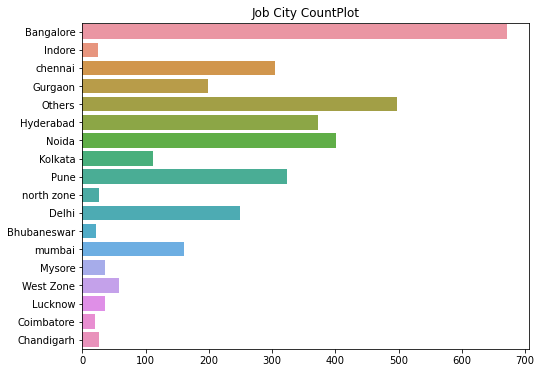

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['JobCity'])
plt.title("Job City CountPlot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**Job City Column Observations**

- Job City Column need a lot of feature engineering 
- Bangalore is the Highest Rank City to Provide Jobs

### Gender Column

In [43]:
df.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [44]:
df.Gender = df.Gender.str.replace('m','Male')
df.Gender = df.Gender.str.replace('f','Female')

In [45]:
df.Gender.value_counts()

Male      3041
Female     957
Name: Gender, dtype: int64

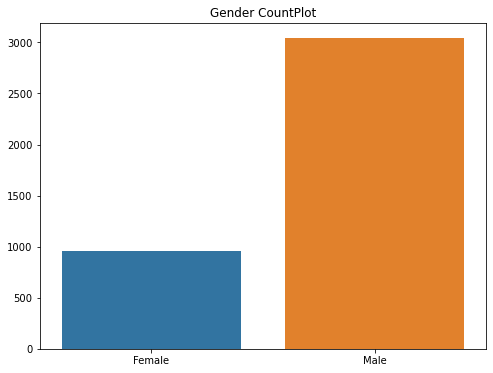

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x=df.Gender)
plt.title("Gender CountPlot")
plt.xlabel("")
plt.ylabel("")
plt.show()

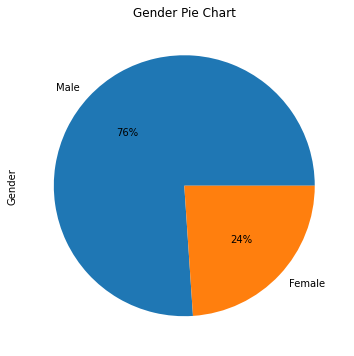

In [47]:
df.Gender.value_counts().plot(kind='pie', autopct='%1.0f%%', title="Gender Pie Chart", figsize=(8,6))
plt.show()

**Gender Column Observations**

- Male are more incompare to female

### (Date of Birth of Candidate) DOB Column

In [48]:
df.DOB

0      1990-02-19
1      1989-10-04
2      1992-08-03
3      1989-12-05
4      1991-02-27
5      1992-07-02
6      1993-02-01
7      1992-05-27
8      1991-09-17
9      1993-06-13
10     1989-06-24
11     1990-02-10
12     1990-11-21
13     1990-10-23
14     1992-07-02
15     1990-01-17
16     1992-06-10
17     1987-09-28
18     1992-12-07
19     1990-11-30
20     1988-07-25
21     1991-08-20
22     1992-01-23
23     1986-07-30
24     1993-06-28
25     1991-03-02
26     1988-02-05
27     1993-02-01
28     1994-01-20
29     1992-06-11
30     1989-10-04
31     1992-10-23
32     1991-09-14
33     1992-01-07
34     1989-08-30
35     1990-09-15
36     1992-08-21
37     1993-02-13
38     1991-10-02
39     1991-02-28
40     1989-05-04
41     1992-04-21
42     1991-12-11
43     1993-07-05
44     1989-01-06
45     1992-10-12
46     1991-09-24
47     1992-02-01
48     1991-02-28
49     1989-03-27
50     1988-02-13
51     1991-11-03
52     1992-03-09
53     1991-08-06
54     1992-01-14
55     199

In [49]:
Age = df.DOB.dt.year
Age = abs(Age - 2015)

In [50]:
Age.value_counts()

24    979
23    855
25    774
26    522
27    308
22    299
28    116
29     62
21     31
30     28
31     13
32      4
20      2
33      2
38      1
18      1
34      1
Name: DOB, dtype: int64

In [51]:
df['Age'] = Age

In [52]:
df['Age'] = df['Age'].astype('int32')

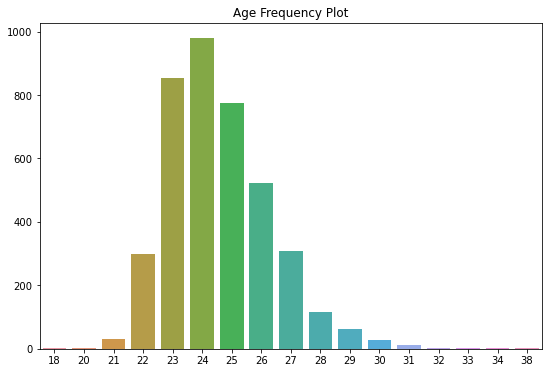

In [53]:
plt.figure(figsize=(9,6))
sns.countplot(x=df.Age)
plt.title("Age Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

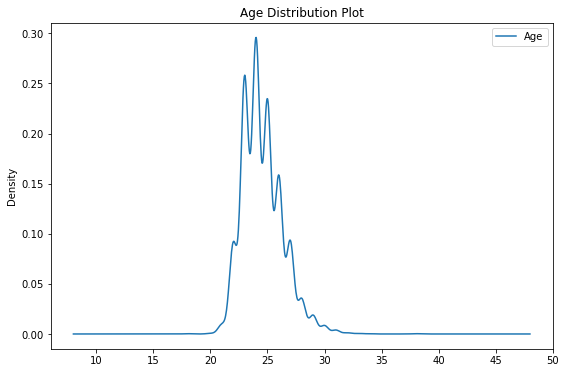

In [54]:
df.Age.plot(kind='kde', title="Age Distribution Plot", legend=True,figsize=(9,6))
plt.show()

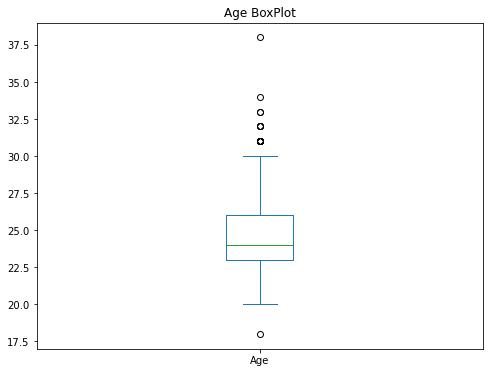

In [55]:
df.Age.plot(kind='box', title="Age BoxPlot", figsize=(8,6))
plt.show()

In [56]:
print("Minimum Age : ", df.Age.min())
print("Maximum Age : ", df.Age.max())
print("Mean Age : ", round(df.Age.mean()))
print("Median Age : ", round(df.Age.median()))
print("Standard Age Values : ", round(df.Age.std()))

Minimum Age :  18
Maximum Age :  38
Mean Age :  25
Median Age :  24
Standard Age Values :  2


In [57]:
print("25 Percentile  : ",round(df.Age.quantile(0.25)))
print("50 Percentile  : ",round(df.Age.quantile(0.50)))
print("60 Percentile  : ",round(df.Age.quantile(0.60)))
print("75 Percentile  : ",round(df.Age.quantile(0.75)))
print("80 Percentile  : ",round(df.Age.quantile(0.80)))
print("90 Percentile  : ",round(df.Age.quantile(0.90)))

25 Percentile  :  23
50 Percentile  :  24
60 Percentile  :  25
75 Percentile  :  26
80 Percentile  :  26
90 Percentile  :  27


**(Date of Birth of Candidate) DOB Column Observations**

- DOB Column need feature engineering for finding insights
- Age of 24 Years Old Candidate are more
- DOB Column have too many Outlier

### 10percentage Column

In [58]:
df['10percentage']

0       84.30
1       85.40
2       85.00
3       85.60
4       78.00
5       89.92
6       86.08
7       92.00
8       90.00
9       77.00
10      88.60
11      81.00
12      83.60
13      60.80
14      81.20
15      69.54
16      85.80
17      60.80
18      65.00
19      79.00
20      91.20
21      75.67
22      92.50
23      70.00
24      88.00
25      86.80
26      90.88
27      76.80
28      84.00
29      64.00
30      84.00
31      77.20
32      87.00
33      73.00
34      71.00
35      85.00
36      91.50
37      77.00
38      52.33
39      88.00
40      66.60
41      75.00
42      91.40
43      59.00
44      84.50
45      95.80
46      85.60
47      69.60
48      86.60
49      81.92
50      66.50
51      80.00
52      85.20
53      89.25
54      58.40
55      90.80
56      78.00
57      89.88
58      63.30
59      72.00
60      83.00
61      85.30
62      81.00
63      60.66
64      78.00
65      89.37
66      90.00
67      81.00
68      78.00
69      84.40
70      89.00
71    

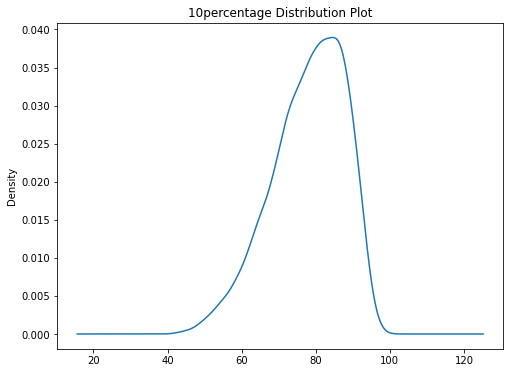

In [59]:
df['10percentage'].plot(kind='kde', title="10percentage Distribution Plot", figsize=(8,6))
plt.show()

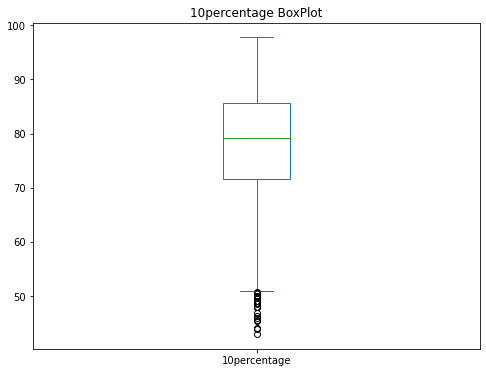

In [60]:
df['10percentage'].plot(kind='box', title="10percentage BoxPlot", figsize=(8,6))
plt.show()

In [61]:
print("Minimum 10percentage : ", df['10percentage'].min())
print("Maximum 10percentage : ", df['10percentage'].max())
print("Mean 10percentage : ", round(df['10percentage'].mean()))
print("Median 10percentage : ", round(df['10percentage'].median()))
print("Standard 10percentage Values : ", round(df['10percentage'].std()))

Minimum 10percentage :  43.0
Maximum 10percentage :  97.76
Mean 10percentage :  78
Median 10percentage :  79
Standard 10percentage Values :  10


In [62]:
print("25 Percentile  : ",round(df['10percentage'].quantile(0.25)))
print("50 Percentile  : ",round(df['10percentage'].quantile(0.50)))
print("60 Percentile  : ",round(df['10percentage'].quantile(0.60)))
print("75 Percentile  : ",round(df['10percentage'].quantile(0.75)))
print("80 Percentile  : ",round(df['10percentage'].quantile(0.80)))
print("90 Percentile  : ",round(df['10percentage'].quantile(0.90)))

25 Percentile  :  72
50 Percentile  :  79
60 Percentile  :  82
75 Percentile  :  86
80 Percentile  :  87
90 Percentile  :  90


**(Overall marks obtained in grade 10 examinations) 10percentage Column Observations**

- 10 Grade Candidates Higest Score is : 97.76
- 10 Grade Candidates Lowest Score is : 43
- 10 Grade Candidates Average Score is : 79
- 10percentage Column Have too many Outlier

### 10board Column

In [63]:
df['10board']

0                          board ofsecondary education,ap
1                                                    cbse
2                                                    cbse
3                                                    cbse
4                                                    cbse
5                                             state board
6                                             state board
7                                                    cbse
8                                                    cbse
9                                                    cbse
10                                        mp board bhopal
11                                                   cbse
12                                            state board
13                                                   cbse
14                                            state board
15                                                   icse
16                                                   cbse
17            

In [64]:
df['10board'].value_counts()

cbse                                                                        1395
state board                                                                 1164
0                                                                            350
icse                                                                         281
ssc                                                                          122
up board                                                                      85
matriculation                                                                 38
rbse                                                                          23
board of secondary education                                                  20
up                                                                            19
mp board                                                                      17
wbbse                                                                         16
sslc                        

In [65]:
lst = []
for i in df['10board']:
    if isinstance(i, str):
        if 'icse' in i.lower():
            lst.append('ICSE')
        elif 'cbse' in i.lower() or 'central board of secondary education' in i.lower() or 'delhi' in i.lower() or 'cbsc' in i.lower():
            lst.append('CBSE')
        else:
            lst.append('State Board')
    else:
        lst.append('State Board')

In [66]:
df['10board'] = lst

In [67]:
df['10board'].value_counts()

State Board    2298
CBSE           1416
ICSE            284
Name: 10board, dtype: int64

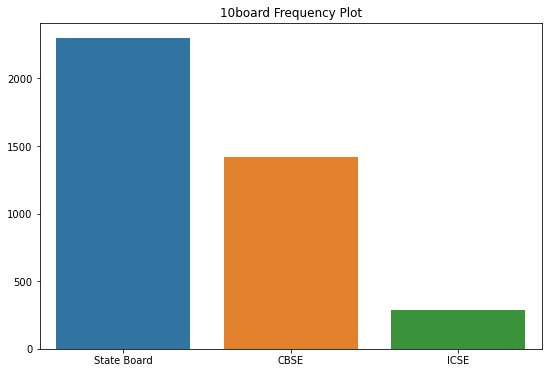

In [68]:
plt.figure(figsize=(9,6))
sns.countplot(x = df['10board'])
plt.title("10board Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

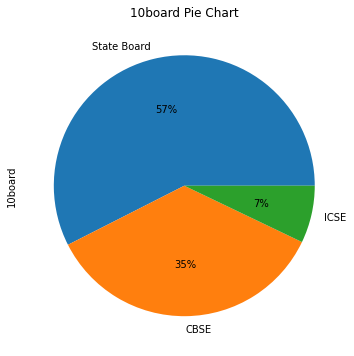

In [69]:
df['10board'].value_counts().plot(kind='pie', autopct='%1.0f%%', title="10board Pie Chart", figsize=(9,6))
plt.show()

**(The school board whose curriculum the candidate followed in grade 10) 10board Column Observations**

- Majoraty of the Candidates are Completing their 10th Grade in State Board

### 12graduation Column

In [70]:
df['12graduation']

0       2007
1       2007
2       2010
3       2007
4       2008
5       2010
6       2010
7       2010
8       2009
9       2010
10      2006
11      2007
12      2008
13      2008
14      2008
15      2008
16      2010
17      2006
18      2008
19      2008
20      2006
21      2007
22      2009
23      2006
24      2010
25      2008
26      2006
27      2009
28      2011
29      2010
30      2007
31      2010
32      2009
33      2010
34      2009
35      2008
36      2009
37      2010
38      2007
39      2008
40      2007
41      2009
42      2010
43      2010
44      2007
45      2010
46      2008
47      2008
48      2009
49      2007
50      2005
51      2009
52      2010
53      2010
54      2008
55      2010
56      2006
57      2007
58      2008
59      1995
60      2009
61      2010
62      2009
63      2008
64      2004
65      2009
66      2006
67      2010
68      2006
69      2011
70      2009
71      2008
72      2010
73      2009
74      2009
75      2010
76      2008

In [71]:
df['12graduation'].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

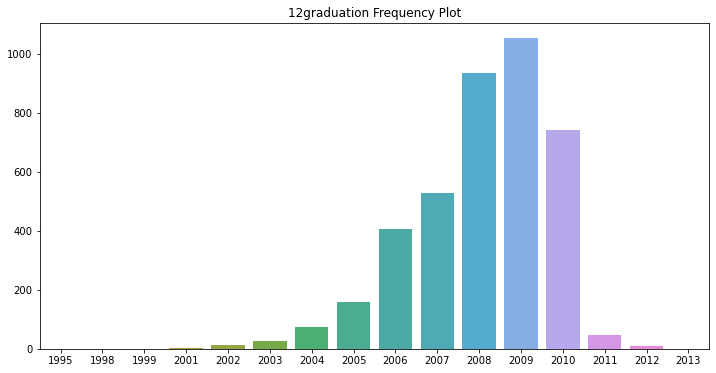

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['12graduation'])
plt.title("12graduation Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**(Year of graduation - senior year high school) 12graduation Column Observations**

- Majoraty of the Candidates are Completing the Grade 12th in Year 2009

### 12percentage Column

In [73]:
df['12percentage']

0       95.80
1       85.00
2       68.20
3       83.60
4       76.80
5       87.00
6       67.50
7       91.00
8       91.20
9       72.20
10      83.70
11      86.00
12      69.83
13      62.40
14      79.90
15      64.43
16      74.80
17      66.66
18      64.80
19      62.20
20      84.63
21      74.40
22      95.20
23      43.42
24      90.00
25      82.80
26      82.50
27      83.00
28      68.00
29      74.00
30      92.00
31      86.10
32      84.40
33      68.40
34      68.00
35      61.00
36      93.80
37      85.40
38      67.00
39      89.66
40      68.60
41      60.00
42      73.00
43      87.70
44      82.50
45      87.16
46      82.00
47      71.40
48      75.00
49      61.46
50      49.50
51      72.50
52      81.50
53      78.00
54      64.80
55      90.10
56      70.10
57      95.40
58      61.10
59      49.00
60      79.00
61      88.30
62      77.80
63      62.40
64      83.00
65      79.00
66      94.40
67      79.00
68      86.67
69      73.20
70      92.00
71    

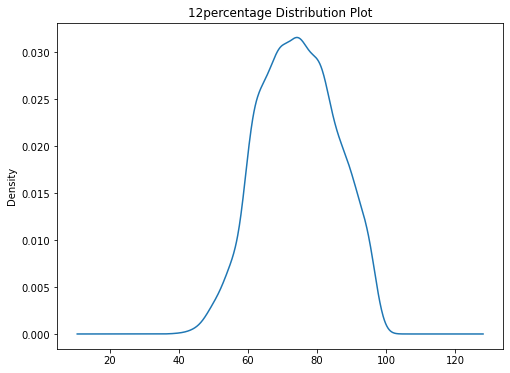

In [74]:
df['12percentage'].plot(kind='kde', title="12percentage Distribution Plot", figsize=(8,6))
plt.show()

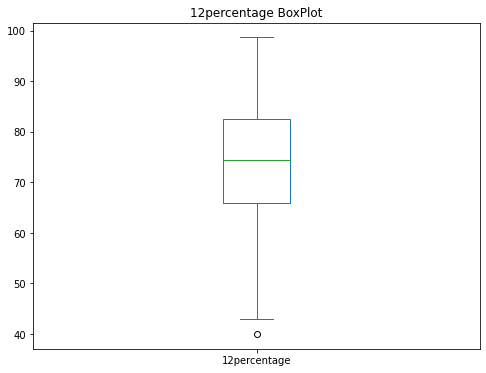

In [75]:
df['12percentage'].plot(kind='box', title="12percentage BoxPlot", figsize=(8,6))
plt.show()

In [76]:
print("Minimum 12percentage : ", df['12percentage'].min())
print("Maximum 12percentage : ", df['12percentage'].max())
print("Mean 12percentage : ", round(df['12percentage'].mean()))
print("Median 12percentage : ", round(df['12percentage'].median()))
print("Standard 12percentage Values : ", round(df['12percentage'].std()))

Minimum 12percentage :  40.0
Maximum 12percentage :  98.7
Mean 12percentage :  74
Median 12percentage :  74
Standard 12percentage Values :  11


In [77]:
print("25 Percentile  : ",round(df['12percentage'].quantile(0.25)))
print("50 Percentile  : ",round(df['12percentage'].quantile(0.50)))
print("60 Percentile  : ",round(df['12percentage'].quantile(0.60)))
print("75 Percentile  : ",round(df['12percentage'].quantile(0.75)))
print("80 Percentile  : ",round(df['12percentage'].quantile(0.80)))
print("90 Percentile  : ",round(df['12percentage'].quantile(0.90)))

25 Percentile  :  66
50 Percentile  :  74
60 Percentile  :  78
75 Percentile  :  83
80 Percentile  :  85
90 Percentile  :  90


**(Overall marks obtained in grade 12 examinations) 12percentage Column Observations**

- 12 Grade Candidates Higest Score is : 98.7
- 12 Grade Candidates Lowest Score is : 40
- 12 Grade Candidates Average Score is : 74
- 10percentage Column Have only one Outlier

### 12board Column

In [78]:
df['12board']

0                      board of intermediate education,ap
1                                                    cbse
2                                                    cbse
3                                                    cbse
4                                                    cbse
5                                             state board
6                                             state board
7                                                    cbse
8                                                    cbse
9                                                    cbse
10                                               mp board
11                                                   cbse
12                                            state board
13                                                   cbse
14                                            state board
15                                                    isc
16                                                   cbse
17            

In [79]:
df['12board'].value_counts()

cbse                                                                           1400
state board                                                                    1254
0                                                                               359
icse                                                                            129
up board                                                                         87
isc                                                                              45
board of intermediate                                                            36
board of intermediate education                                                  31
up                                                                               20
rbse                                                                             19
mp board                                                                         17
bie                                                                         

In [80]:
list1 = []
for i in df['12board']:
    if isinstance(i, str):
        if 'isc' in i.lower():
            list1.append('ISC')
        elif 'cbse' in i.lower():
            list1.append('CBSE')
        elif 'nios' in i.lower():
            list1.append('National Board')
        elif 'diploma' in i.lower():
            list1.append('Diploma')
        elif 'technical' in i.lower():
            list1.append('Technical')
        elif 'university' in i.lower():
            list1.append('University')
        else:
            list1.append('State Board')
    else:
        list1.append('State Board')

In [81]:
df['12board']=list1
df['12board'].value_counts()

State Board       2486
CBSE              1402
ISC                 48
University          32
Technical           15
Diploma              8
National Board       7
Name: 12board, dtype: int64

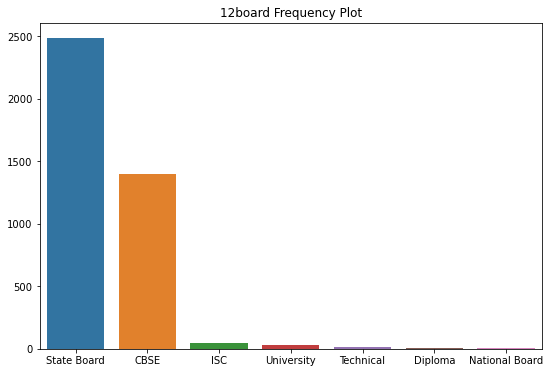

In [82]:
plt.figure(figsize=(9,6))
sns.countplot(x = df['12board'])
plt.title("12board Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**(The school board whose curriculum the candidate followed in grade 12) 12board Column Observations**

- Majoraty of the Candidates are Completing their 12th Grade in State Board

### CollegeTier Column

In [83]:
df['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

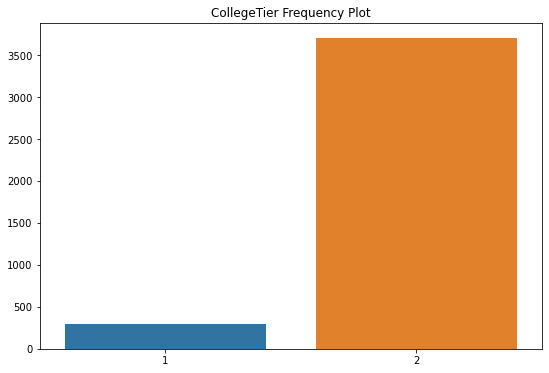

In [84]:
plt.figure(figsize=(9,6))
sns.countplot(x = df['CollegeTier'])
plt.title("CollegeTier Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**(Tier of college) CollegeTier Column Observations**

- Majoraty of the Candidates are come from Tier 2 college

### Degree Column

In [85]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

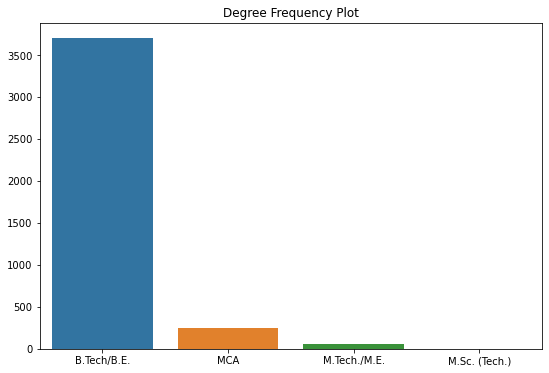

In [86]:
plt.figure(figsize=(9,6))
sns.countplot(x = df['Degree'])
plt.title("Degree Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**(Degree obtained/pursued by the candidate) Degree Column Observations**

- Majoraty of the Candidates are come from B.Tech/B.E

### Specialization Column

In [87]:
df.Specialization

0                              computer engineering
1         electronics and communication engineering
2                            information technology
3                              computer engineering
4         electronics and communication engineering
5         electronics and communication engineering
6                    computer science & engineering
7                            mechanical engineering
8            electronics and electrical engineering
9         electronics and communication engineering
10                             computer engineering
11                           information technology
12                 electronics & telecommunications
13        electronics and communication engineering
14          instrumentation and control engineering
15                           information technology
16        electronics and communication engineering
17                             computer application
18                   computer science & engineering
19          

In [88]:
df.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [89]:
df.Specialization = df.Specialization.str.replace('computer engineering' ,'computers')
df.Specialization = df.Specialization.str.replace('information technology' ,'computers')
df.Specialization = df.Specialization.str.replace('computer science & engineering' ,'computers')
df.Specialization = df.Specialization.str.replace('computer application' ,'computers')
df.Specialization = df.Specialization.str.replace('electronics and computer engineering' ,'computers')
df.Specialization = df.Specialization.str.replace('information technology' ,'computers')
df.Specialization = df.Specialization.str.replace('information science engineering' ,'computers')
df.Specialization = df.Specialization.str.replace('computer science and technology' ,'computers')
df.Specialization = df.Specialization.str.replace('computer and communication engineering' ,'computers')
df.Specialization = df.Specialization.str.replace('information & communication technology' ,'computers')
df.Specialization = df.Specialization.str.replace('information science' ,'computers')
df.Specialization = df.Specialization.str.replace('computer networking' ,'computers')
df.Specialization = df.Specialization.str.replace('computer science' ,'computers')

df.Specialization = df.Specialization.str.replace('electronics and communication engineering' ,'etrx')
df.Specialization = df.Specialization.str.replace('electronics and electrical engineering' ,'etrx')
df.Specialization = df.Specialization.str.replace('electronics & telecommunications' ,'etrx')
df.Specialization = df.Specialization.str.replace('electrical engineering' ,'etrx')
df.Specialization = df.Specialization.str.replace('applied electronics and instrumentation' ,'etrx')
df.Specialization = df.Specialization.str.replace('electronics & instrumentation eng' ,'etrx')
df.Specialization = df.Specialization.str.replace('electronics and instrumentation engineering' ,'etrx')
df.Specialization = df.Specialization.str.replace('electronics engineering' ,'etrx')
df.Specialization = df.Specialization.str.replace('embedded systems technology' ,'etrx')
df.Specialization = df.Specialization.str.replace('electrical and power engineering' ,'etrx')
df.Specialization = df.Specialization.str.replace('mechatronics' ,'etrx')
df.Specialization = df.Specialization.str.replace('telecommunication engineering','etrx')
df.Specialization = df.Specialization.str.replace('electronics' ,'etrx')

df.Specialization = df.Specialization.str.replace('mechanical engineering','mech')
df.Specialization = df.Specialization.str.replace('mechanical and automation','mech')
df.Specialization = df.Specialization.str.replace('metallurgical engineering','mech')
df.Specialization = df.Specialization.str.replace('ceramic engineering','mech')
df.Specialization = df.Specialization.str.replace('mechatronics','mech')
df.Specialization = df.Specialization.str.replace('mechanical & production engineering','mech')
df.Specialization = df.Specialization.str.replace('internal combustion engine','mech')
df.Specialization = df.Specialization.str.replace('industrial & production engineering','mech')
df.Specialization = df.Specialization.str.replace('automobile/automotive engineering','mech')
df.Specialization = df.Specialization.str.replace('industrial engineering','mech')
df.Specialization = df.Specialization.str.replace('power systems and automation','mech')
df.Specialization = df.Specialization.str.replace('industrial & management engineering','mech')

df.Specialization = df.Specialization.str.replace('control and instrumentation engineering','instrumentation engineering')
df.Specialization = df.Specialization.str.replace('polymer technology','chemical engineering')
df.Specialization = df.Specialization.str.replace('etrx and computers' ,'etrx')

In [90]:
df.Specialization.value_counts()

computers                                  2288
etrx                                       1383
mech                                        230
civil engineering                            29
instrumentation and control engineering      20
biotechnology                                15
other                                        13
chemical engineering                         10
instrumentation engineering                   5
aeronautical engineering                      3
biomedical engineering                        2
Name: Specialization, dtype: int64

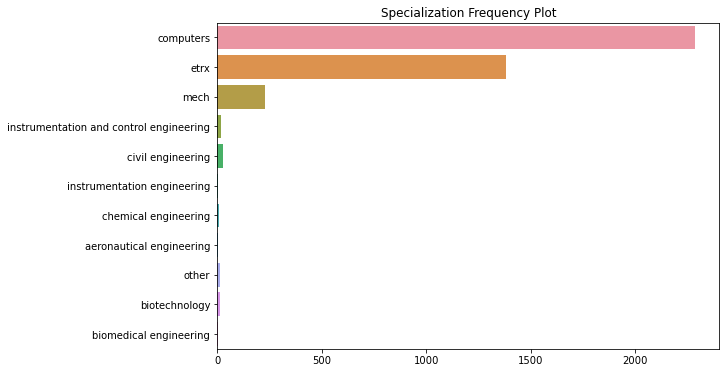

In [91]:
plt.figure(figsize=(9,6))
sns.countplot(y = df['Specialization'])
plt.title("Specialization Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**(Degree obtained/pursued by the candidate) Specialization Column Observations**

- Specialization Columns lot of Featuring Engineering for finding insights
- Majoraty of the Candidates are Specialize in Computers

### collegeGPA Column

In [92]:
df.collegeGPA

0       78.00
1       70.06
2       70.00
3       74.64
4       73.90
5       76.32
6       72.98
7        8.58
8       85.03
9       78.00
10      74.90
11      72.29
12      60.00
13      60.00
14      67.67
15      63.00
16      64.80
17      74.74
18      69.54
19      76.30
20      78.15
21      74.01
22      76.00
23      55.52
24      76.00
25      78.00
26      66.15
27      76.44
28      72.00
29      68.00
30      77.20
31      71.00
32      79.30
33      74.30
34      70.86
35      64.98
36      74.10
37      63.90
38      77.15
39      76.40
40      60.22
41      66.00
42      71.00
43      71.04
44      92.10
45      79.00
46      74.01
47      77.00
48      74.00
49      57.54
50      89.70
51      57.80
52      57.64
53      80.00
54      80.00
55      67.70
56      68.20
57      80.80
58      66.90
59      55.00
60      70.00
61      85.00
62      65.35
63      69.30
64      72.13
65      70.00
66      76.12
67      71.50
68      77.55
69      70.00
70      76.40
71    

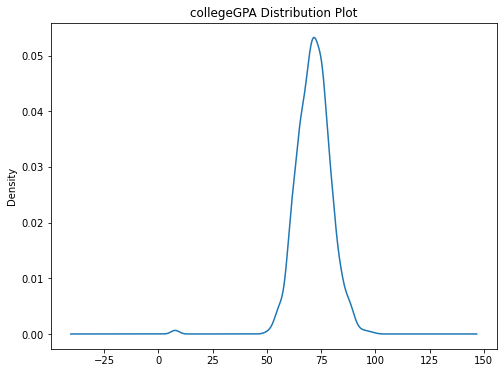

In [93]:
df.collegeGPA.plot(kind='kde', title="collegeGPA Distribution Plot", figsize=(8,6))
plt.show()

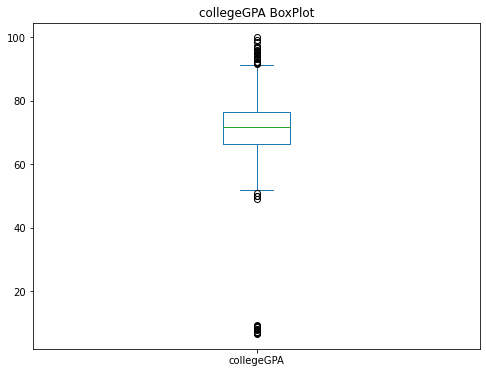

In [94]:
df.collegeGPA.plot(kind='box', title="collegeGPA BoxPlot", figsize=(8,6))
plt.show()

In [95]:
print("Minimum collegeGPA : ", df['collegeGPA'].min())
print("Maximum collegeGPA : ", df['collegeGPA'].max())
print("Mean collegeGPA : ", round(df['collegeGPA'].mean()))
print("Median collegeGPA : ", round(df['collegeGPA'].median()))
print("Standard collegeGPA Values : ", round(df['collegeGPA'].std()))

Minimum collegeGPA :  6.45
Maximum collegeGPA :  99.93
Mean collegeGPA :  71
Median collegeGPA :  72
Standard collegeGPA Values :  8


In [96]:
print("25 Percentile  : ",round(df['collegeGPA'].quantile(0.25)))
print("50 Percentile  : ",round(df['collegeGPA'].quantile(0.50)))
print("60 Percentile  : ",round(df['collegeGPA'].quantile(0.60)))
print("75 Percentile  : ",round(df['collegeGPA'].quantile(0.75)))
print("80 Percentile  : ",round(df['collegeGPA'].quantile(0.80)))
print("90 Percentile  : ",round(df['collegeGPA'].quantile(0.90)))

25 Percentile  :  66
50 Percentile  :  72
60 Percentile  :  73
75 Percentile  :  76
80 Percentile  :  78
90 Percentile  :  81


**(Aggregate GPA at graduation) collegeGPA Column Observations**

- collegeGPA Candidates Higest Score is : 6.45
- collegeGPA Candidates Lowest Score is : 99.93
- collegeGPA Candidates Average Score is : 72
- collegeGPA Column Have too many Outlier

### CollegeCityTier Column

In [97]:
df.CollegeCityTier

0       0
1       0
2       0
3       1
4       0
5       0
6       1
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      1
18      0
19      0
20      0
21      0
22      0
23      1
24      1
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      1
33      1
34      0
35      0
36      1
37      0
38      0
39      0
40      0
41      0
42      0
43      1
44      0
45      0
46      0
47      0
48      0
49      1
50      0
51      0
52      0
53      1
54      0
55      0
56      0
57      1
58      0
59      0
60      1
61      1
62      0
63      0
64      1
65      0
66      0
67      0
68      1
69      0
70      1
71      0
72      1
73      0
74      0
75      1
76      0
77      0
78      1
79      0
80      0
81      1
82      0
83      1
84      1
85      0
86      1
87      0
88      0
89      0
90      1
91      1
92      1
93      0
94      0
95      0
96      0
97      0
98      1
99      1


In [98]:
df.CollegeCityTier.value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

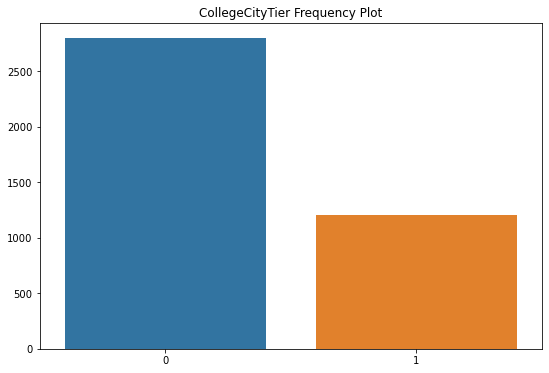

In [99]:
plt.figure(figsize=(9,6))
sns.countplot(x = df['CollegeCityTier'])
plt.title("CollegeCityTier Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**(The tier of the city in which the college is located) CollegeCityTier Column Observations**

- Majoraty of the Candidates are come from CollegeCityTier 0 college

### CollegeState Column

In [100]:
df.CollegeState

0          Andhra Pradesh
1          Madhya Pradesh
2           Uttar Pradesh
3                   Delhi
4           Uttar Pradesh
5               Karnataka
6               Karnataka
7              Tamil Nadu
8                   Delhi
9             West Bengal
10         Madhya Pradesh
11         Madhya Pradesh
12            Maharashtra
13                Haryana
14          Uttar Pradesh
15          Uttar Pradesh
16          Uttar Pradesh
17                  Delhi
18          Uttar Pradesh
19          Uttar Pradesh
20              Karnataka
21          Uttar Pradesh
22              Telangana
23              Karnataka
24              Telangana
25                Haryana
26                 Orissa
27          Uttar Pradesh
28          Uttar Pradesh
29                Haryana
30         Andhra Pradesh
31             Tamil Nadu
32                  Delhi
33            West Bengal
34          Uttar Pradesh
35                 Punjab
36              Telangana
37                 Punjab
38          

In [101]:
df.CollegeState.value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

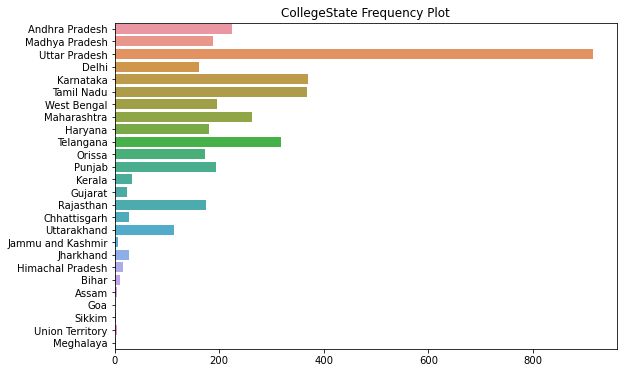

In [102]:
plt.figure(figsize=(9,6))
sns.countplot(y = df['CollegeState'])
plt.title("CollegeState Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**(Name of States) CollegeState Column Observations**

- Majoraty of the Candidates are come from Uttar Pradesh

### GraduationYear Column

In [103]:
df.GraduationYear

0       2011
1       2012
2       2014
3       2011
4       2012
5       2014
6       2014
7       2016
8       2013
9       2014
10      2010
11      2011
12      2013
13      2012
14      2013
15      2012
16      2014
17      2013
18      2013
19      2012
20      2010
21      2012
22      2013
23      2014
24      2014
25      2012
26      2010
27      2014
28      2015
29      2014
30      2011
31      2014
32      2013
33      2014
34      2013
35      2011
36      2013
37      2014
38      2013
39      2012
40      2011
41      2014
42      2014
43      2014
44      2011
45      2014
46      2012
47      2012
48      2013
49      2011
50      2011
51      2013
52      2014
53      2014
54      2014
55      2014
56      2011
57      2011
58      2013
59      2011
60      2013
61      2014
62      2014
63      2013
64      2010
65      2013
66      2010
67      2014
68      2010
69      2015
70      2013
71      2013
72      2014
73      2014
74      2013
75      2014
76      2012

In [104]:
df.GraduationYear.value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [105]:
df.GraduationYear = df.GraduationYear.replace(0,2007)

In [106]:
df.GraduationYear.value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       2
Name: GraduationYear, dtype: int64

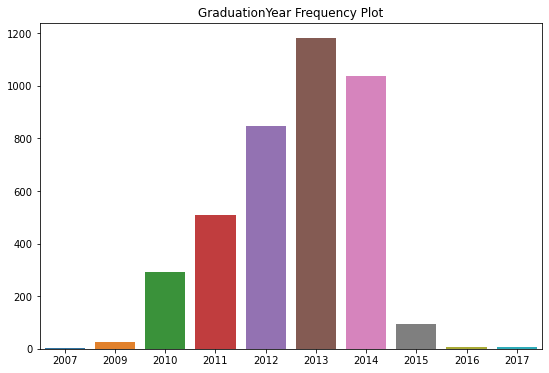

In [107]:
plt.figure(figsize=(9,6))
sns.countplot(x = df['GraduationYear'])
plt.title("GraduationYear Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**(Year of graduation (Bachelor’s degree)) GraduationYear Column Observations**

- Majoraty of the Candidates are Graduate in Year 2013

### English Column

In [108]:
df.English

0       515
1       695
2       615
3       635
4       545
5       560
6       590
7       545
8       615
9       605
10      565
11      495
12      380
13      495
14      395
15      485
16      685
17      465
18      465
19      485
20      455
21      385
22      395
23      370
24      625
25      575
26      415
27      535
28      580
29      485
30      475
31      560
32      570
33      560
34      430
35      570
36      380
37      475
38      450
39      510
40      425
41      380
42      555
43      300
44      425
45      430
46      370
47      485
48      505
49      565
50      505
51      580
52      545
53      570
54      440
55      525
56      415
57      555
58      420
59      640
60      430
61      370
62      535
63      370
64      444
65      630
66      505
67      510
68      535
69      570
70      625
71      665
72      675
73      510
74      325
75      580
76      515
77      510
78      535
79      405
80      665
81      555
82      395
83  

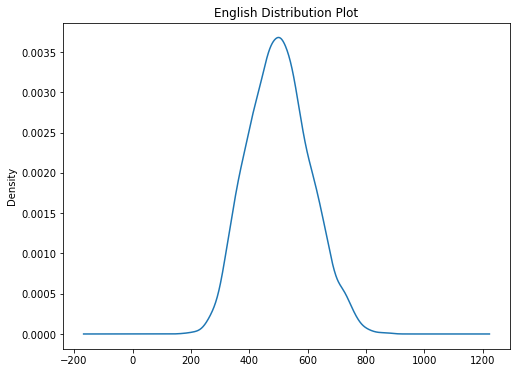

In [109]:
df.English.plot(kind='kde', title="English Distribution Plot", figsize=(8,6))
plt.show()

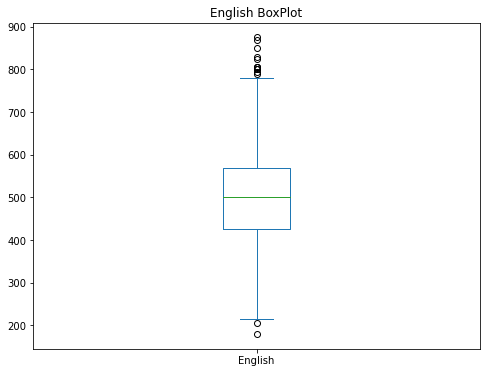

In [110]:
df.English.plot(kind='box', title="English BoxPlot", figsize=(8,6))
plt.show()

In [111]:
print("Minimum English Score   : ", df['English'].min())
print("Maximum English Score   : ", df['English'].max())
print("Mean English Score      : ", round(df['English'].mean()))
print("Median English Score    : ", round(df['English'].median()))
print("Standard English Values : ", round(df['English'].std()))

Minimum English Score   :  180
Maximum English Score   :  875
Mean English Score      :  502
Median English Score    :  500
Standard English Values :  105


In [116]:
print("25 Percentile  : ",round(df['English'].quantile(0.25)))
print("50 Percentile  : ",round(df['English'].quantile(0.50)))
print("60 Percentile  : ",round(df['English'].quantile(0.60)))
print("75 Percentile  : ",round(df['English'].quantile(0.75)))
print("80 Percentile  : ",round(df['English'].quantile(0.80)))
print("90 Percentile  : ",round(df['English'].quantile(0.90)))

25 Percentile  :  425
50 Percentile  :  500
60 Percentile  :  525
75 Percentile  :  570
80 Percentile  :  590
90 Percentile  :  640


**(Scores in AMCAT English section) English Column Observations**

- Candidates Higest Scores in AMCAT English section is : 875
- Candidates Lowest Scores in AMCAT English section is : 180
- Candidates Average Scores in AMCAT English section is : 500
- English Column have normal distribution
- Logical Column Have many Outlier

### Logical Column

In [117]:
df.Logical

0       585
1       610
2       545
3       585
4       625
5       555
6       435
7       555
8       670
9       565
10      455
11      605
12      580
13      425
14      565
15      520
16      530
17      585
18      495
19      445
20      535
21      555
22      455
23      360
24      555
25      585
26      335
27      510
28      570
29      375
30      405
31      485
32      475
33      530
34      510
35      475
36      535
37      605
38      525
39      640
40      595
41      545
42      560
43      340
44      525
45      395
46      495
47      415
48      545
49      465
50      505
51      485
52      385
53      510
54      415
55      530
56      595
57      475
58      510
59      460
60      410
61      375
62      510
63      410
64      555
65      580
66      525
67      500
68      465
69      410
70      645
71      545
72      480
73      480
74      510
75      485
76      475
77      355
78      435
79      545
80      595
81      475
82      455
83  

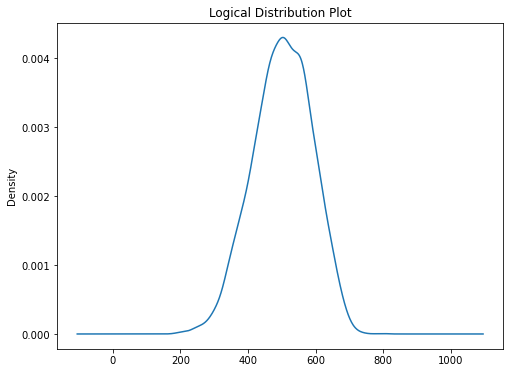

In [118]:
df.Logical.plot(kind='kde', title="Logical Distribution Plot", figsize=(8,6))
plt.show()

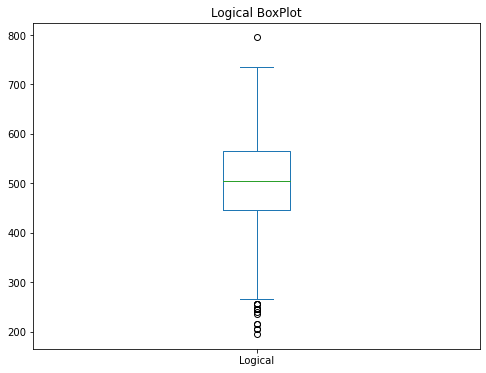

In [119]:
df.Logical.plot(kind='box', title="Logical BoxPlot", figsize=(8,6))
plt.show()

In [120]:
print("Minimum Logical Score   : ", df['Logical'].min())
print("Maximum Logical Score   : ", df['Logical'].max())
print("Mean Logical Score      : ", round(df['Logical'].mean()))
print("Median Logical Score    : ", round(df['Logical'].median()))
print("Standard Logical Values : ", round(df['Logical'].std()))

Minimum Logical Score   :  195
Maximum Logical Score   :  795
Mean Logical Score      :  502
Median Logical Score    :  505
Standard Logical Values :  87


In [121]:
print("25 Percentile  : ",round(df['Logical'].quantile(0.25)))
print("50 Percentile  : ",round(df['Logical'].quantile(0.50)))
print("60 Percentile  : ",round(df['Logical'].quantile(0.60)))
print("75 Percentile  : ",round(df['Logical'].quantile(0.75)))
print("80 Percentile  : ",round(df['Logical'].quantile(0.80)))
print("90 Percentile  : ",round(df['Logical'].quantile(0.90)))

25 Percentile  :  445
50 Percentile  :  505
60 Percentile  :  525
75 Percentile  :  565
80 Percentile  :  580
90 Percentile  :  610


**(Scores in AMCAT Logical section) Logical Column Observations**

- Candidates Higest Scores in AMCAT Logical section is : 795
- Candidates Lowest Scores in AMCAT Logical section is : 195
- Candidates Average Scores in AMCAT Logical section is : 505
- Logical Column have normal distribution
- Logical Column Have many Outlier

### Quant Column

In [122]:
df.Quant

0       525
1       780
2       370
3       625
4       465
5       620
6       380
7       590
8       530
9       545
10      565
11      715
12      470
13      645
14      645
15      355
16      620
17      515
18      515
19      435
20      445
21      445
22      485
23      270
24      630
25      575
26      405
27      605
28      385
29      435
30      695
31      450
32      295
33      605
34      405
35      430
36      530
37      415
38      545
39      635
40      475
41      460
42      825
43      355
44      515
45      500
46      455
47      575
48      565
49      415
50      485
51      455
52      485
53      545
54      554
55      595
56      495
57      635
58      665
59      250
60      310
61      325
62      390
63      470
64      695
65      510
66      595
67      575
68      535
69      535
70      605
71      415
72      500
73      485
74      295
75      510
76      635
77      340
78      440
79      450
80      705
81      415
82      475
83  

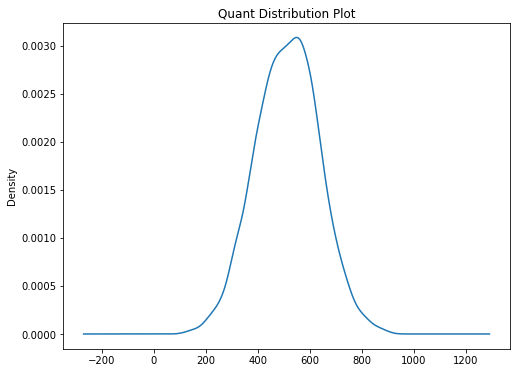

In [123]:
df.Quant.plot(kind='kde', title="Quant Distribution Plot", figsize=(8,6))
plt.show()

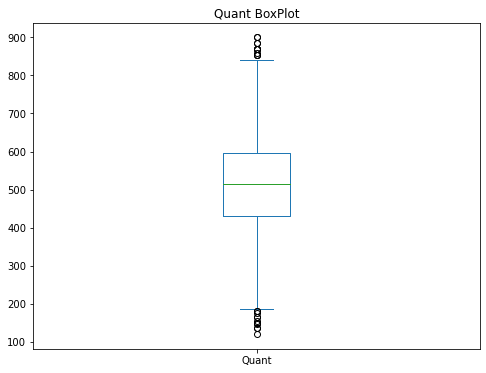

In [124]:
df.Quant.plot(kind='box', title="Quant BoxPlot", figsize=(8,6))
plt.show()

In [125]:
print("Minimum Quant Score   : ", df['Quant'].min())
print("Maximum Quant Score   : ", df['Quant'].max())
print("Mean Quant Score      : ", round(df['Quant'].mean()))
print("Median Quant Score    : ", round(df['Quant'].median()))
print("Standard Quant Values : ", round(df['Quant'].std()))

Minimum Quant Score   :  120
Maximum Quant Score   :  900
Mean Quant Score      :  513
Median Quant Score    :  515
Standard Quant Values :  122


In [126]:
print("25 Percentile  : ",round(df['Quant'].quantile(0.25)))
print("50 Percentile  : ",round(df['Quant'].quantile(0.50)))
print("60 Percentile  : ",round(df['Quant'].quantile(0.60)))
print("75 Percentile  : ",round(df['Quant'].quantile(0.75)))
print("80 Percentile  : ",round(df['Quant'].quantile(0.80)))
print("90 Percentile  : ",round(df['Quant'].quantile(0.90)))

25 Percentile  :  430
50 Percentile  :  515
60 Percentile  :  545
75 Percentile  :  595
80 Percentile  :  615
90 Percentile  :  665


**(Scores in AMCAT Quantitative section) Quant Column Observations**

- Candidates Higest Scores in AMCAT Quantitative section is : 900
- Candidates Lowest Scores in AMCAT Quantitative section is : 120
- Candidates Average Scores in AMCAT Quantitative section is : 515
- Quant Column have normal distribution
- Quant Column Have many Outlier

### Domain Column

In [127]:
df.Domain

0       0.635979
1       0.960603
2       0.450877
3       0.974396
4       0.124502
5      -1.000000
6       0.356536
7       0.829585
8       0.694479
9       0.493596
10      0.765674
11      0.968237
12      0.229482
13      0.538387
14     -1.000000
15      0.308401
16     -1.000000
17      0.911395
18      0.563268
19      0.864685
20      0.635979
21      0.635979
22     -1.000000
23      0.649390
24      0.356536
25      0.744758
26      0.884123
27      0.881620
28      0.207392
29      0.486747
30      0.670743
31      0.622643
32      0.413838
33      0.911395
34      0.356536
35     -1.000000
36      0.525923
37      0.649390
38      0.735796
39      0.124502
40      0.130442
41      0.356536
42      0.237803
43      0.112139
44      0.377551
45      0.066961
46      0.080055
47      0.925646
48      0.356536
49      0.843124
50      0.916870
51      0.783304
52      0.600057
53      0.792936
54      0.793581
55      0.486747
56      0.694479
57      0.694479
58      0.1121

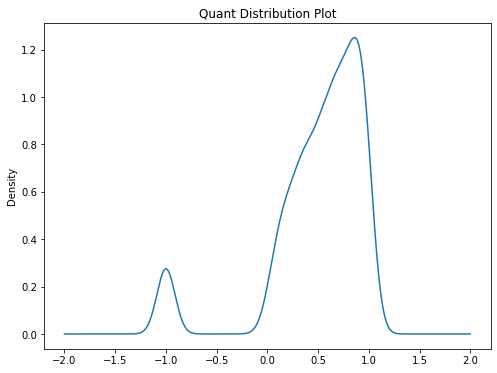

In [128]:
df.Domain.plot(kind='kde', title="Quant Distribution Plot", figsize=(8,6))
plt.show()

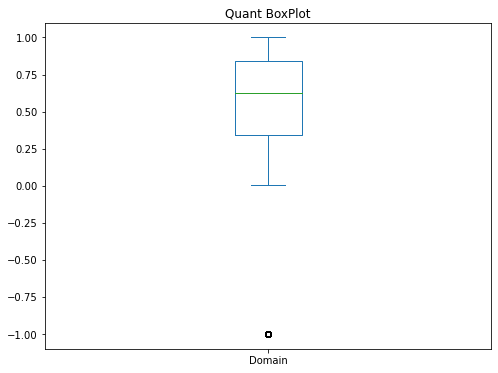

In [129]:
df.Domain.plot(kind='box', title="Quant BoxPlot", figsize=(8,6))
plt.show()

In [130]:
print("Minimum Quant Score   : ", df['Domain'].min())
print("Maximum Quant Score   : ", df['Domain'].max())
print("Mean Quant Score      : ", round(df['Domain'].mean()))
print("Median Quant Score    : ", round(df['Domain'].median()))
print("Standard Quant Values : ", round(df['Domain'].std()))

Minimum Quant Score   :  -1.0
Maximum Quant Score   :  0.999910407631314
Mean Quant Score      :  1
Median Quant Score    :  1
Standard Quant Values :  0


In [131]:
print("25 Percentile  : ",round(df['Domain'].quantile(0.25)))
print("50 Percentile  : ",round(df['Domain'].quantile(0.50)))
print("60 Percentile  : ",round(df['Domain'].quantile(0.60)))
print("75 Percentile  : ",round(df['Domain'].quantile(0.75)))
print("80 Percentile  : ",round(df['Domain'].quantile(0.80)))
print("90 Percentile  : ",round(df['Domain'].quantile(0.90)))

25 Percentile  :  0
50 Percentile  :  1
60 Percentile  :  1
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1


**(Scores in AMCAT’s Domain module) Domain Column Observations**

- Candidates Higest Scores in AMCAT Domain section is : 0.99
- Candidates Lowest Scores in AMCAT Domain section is : -1.0
- Candidates Average Scores in AMCAT Domain section is : 1
- Domain Column have binormal distribution
- Domain Column Have only one Outlier

### ComputerProgramming Column

In [132]:
df.ComputerProgramming

0       445
1        -1
2       395
3       615
4        -1
5       645
6       405
7        -1
8       735
9       385
10      485
11      605
12       -1
13      385
14      495
15      355
16      515
17      545
18      425
19      525
20      445
21      445
22      455
23       -1
24      475
25      565
26      535
27       -1
28      335
29      345
30      455
31      485
32      385
33      445
34      465
35       -1
36      415
37      435
38      475
39       -1
40       -1
41      395
42      525
43      155
44      375
45       -1
46      445
47       -1
48      475
49      515
50      555
51      405
52      435
53       -1
54      495
55      485
56       -1
57       -1
58       -1
59      415
60      305
61      315
62       -1
63      315
64      804
65       -1
66      615
67      455
68      445
69      455
70      385
71      405
72      425
73       -1
74      415
75      285
76      575
77      285
78      355
79      375
80      505
81       -1
82      195
83  

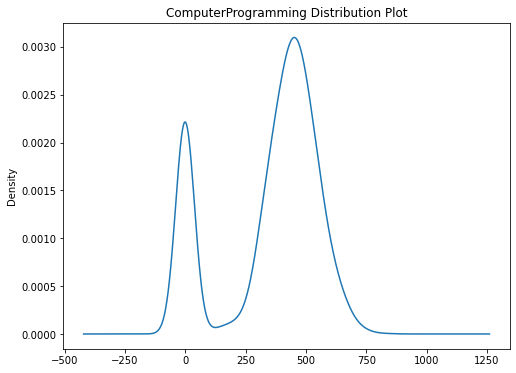

In [133]:
df.ComputerProgramming.plot(kind='kde', title="ComputerProgramming Distribution Plot", figsize=(8,6))
plt.show()

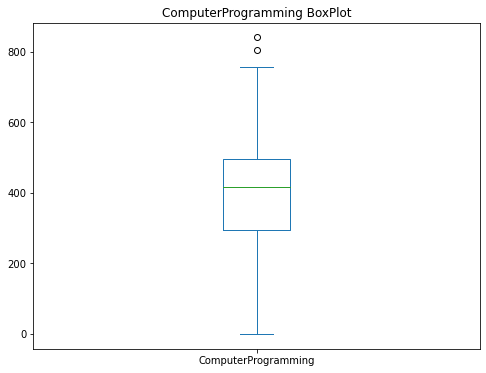

In [134]:
df.ComputerProgramming.plot(kind='box', title="ComputerProgramming BoxPlot", figsize=(8,6))
plt.show()

In [135]:
print("Minimum ComputerProgramming Score   : ", df['ComputerProgramming'].min())
print("Maximum ComputerProgramming Score   : ", df['ComputerProgramming'].max())
print("Mean ComputerProgramming Score      : ", round(df['ComputerProgramming'].mean()))
print("Median ComputerProgramming Score    : ", round(df['ComputerProgramming'].median()))
print("Standard ComputerProgramming Values : ", round(df['ComputerProgramming'].std()))

Minimum ComputerProgramming Score   :  -1
Maximum ComputerProgramming Score   :  840
Mean ComputerProgramming Score      :  353
Median ComputerProgramming Score    :  415
Standard ComputerProgramming Values :  205


In [136]:
print("25 Percentile  : ",round(df['ComputerProgramming'].quantile(0.25)))
print("50 Percentile  : ",round(df['ComputerProgramming'].quantile(0.50)))
print("60 Percentile  : ",round(df['ComputerProgramming'].quantile(0.60)))
print("75 Percentile  : ",round(df['ComputerProgramming'].quantile(0.75)))
print("80 Percentile  : ",round(df['ComputerProgramming'].quantile(0.80)))
print("90 Percentile  : ",round(df['ComputerProgramming'].quantile(0.90)))

25 Percentile  :  295
50 Percentile  :  415
60 Percentile  :  445
75 Percentile  :  495
80 Percentile  :  515
90 Percentile  :  555


**(Score in AMCAT’s Computer programming section) ComputerProgramming Column Observations**

- Candidates Higest Scores in AMCAT ComputerProgramming section is : 840
- Candidates Lowest Scores in AMCAT ComputerProgramming section is : -1
- Candidates Average Scores in AMCAT ComputerProgramming section is : 415
- ComputerProgramming Column have binormal distribution
- ComputerProgramming Column Have only two Outlier

### ElectronicsAndSemicon

In [137]:
df.ElectronicsAndSemicon

0        -1
1       466
2        -1
3        -1
4       233
5        -1
6        -1
7        -1
8       366
9       324
10       -1
11       -1
12      266
13      333
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23      356
24       -1
25       -1
26      333
27      420
28      260
29       -1
30       -1
31       -1
32       -1
33       -1
34       -1
35       -1
36       -1
37      356
38       -1
39      233
40       -1
41       -1
42       -1
43      228
44       -1
45       -1
46       -1
47       -1
48       -1
49       -1
50       -1
51      388
52       -1
53       -1
54       -1
55       -1
56      366
57      366
58      228
59      300
60       -1
61       -1
62      260
63       -1
64       -1
65      292
66      233
67      324
68      433
69       -1
70      388
71       -1
72       -1
73       -1
74       -1
75      196
76       -1
77       -1
78      260
79      356
80       -1
81      366
82      366
83  

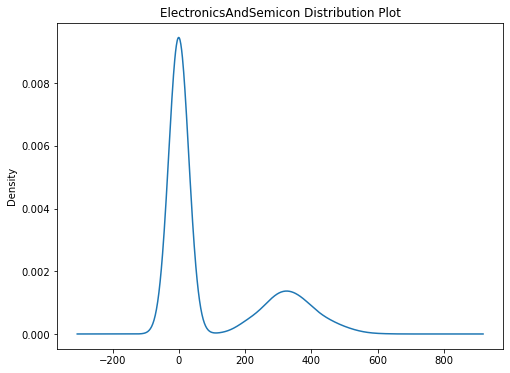

In [138]:
df.ElectronicsAndSemicon.plot(kind='kde', title="ElectronicsAndSemicon Distribution Plot", figsize=(8,6))
plt.show()

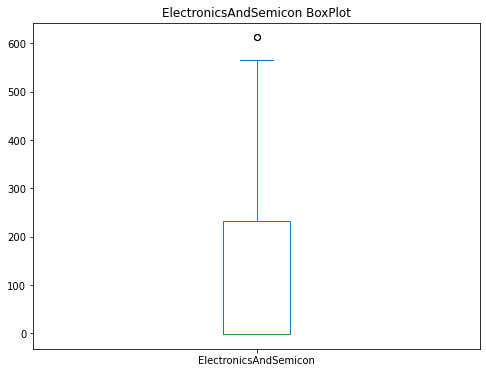

In [139]:
df.ElectronicsAndSemicon.plot(kind='box', title="ElectronicsAndSemicon BoxPlot", figsize=(8,6))
plt.show()

In [140]:
print("Minimum ElectronicsAndSemicon Score   : ", df['ElectronicsAndSemicon'].min())
print("Maximum ElectronicsAndSemicon Score   : ", df['ElectronicsAndSemicon'].max())
print("Mean ElectronicsAndSemicon Score      : ", round(df['ElectronicsAndSemicon'].mean()))
print("Median ElectronicsAndSemicon Score    : ", round(df['ElectronicsAndSemicon'].median()))
print("Standard ElectronicsAndSemicon Values : ", round(df['ElectronicsAndSemicon'].std()))

Minimum ElectronicsAndSemicon Score   :  -1
Maximum ElectronicsAndSemicon Score   :  612
Mean ElectronicsAndSemicon Score      :  95
Median ElectronicsAndSemicon Score    :  -1
Standard ElectronicsAndSemicon Values :  158


In [141]:
print("25 Percentile  : ",round(df['ElectronicsAndSemicon'].quantile(0.25)))
print("50 Percentile  : ",round(df['ElectronicsAndSemicon'].quantile(0.50)))
print("60 Percentile  : ",round(df['ElectronicsAndSemicon'].quantile(0.60)))
print("75 Percentile  : ",round(df['ElectronicsAndSemicon'].quantile(0.75)))
print("80 Percentile  : ",round(df['ElectronicsAndSemicon'].quantile(0.80)))
print("90 Percentile  : ",round(df['ElectronicsAndSemicon'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  -1
60 Percentile  :  -1
75 Percentile  :  233
80 Percentile  :  292
90 Percentile  :  366


**(Score in AMCAT’s Electronics & Semiconductor Engineering section) ElectronicsAndSemicon Column Observations**

- Candidates Higest Scores in AMCAT Electronics & Semiconductor Engineering section is : 612
- Candidates Lowest Scores in AMCAT Electronics & Semiconductor Engineering section is : -1
- Candidates Average Scores in AMCAT Electronics & Semiconductor Engineering section is : -1
- ElectronicsAndSemicon Column have binormal distribution
- ElectronicsAndSemicon Column Have only one Outlier

### ComputerScience Column

In [142]:
df.ComputerScience

0        -1
1        -1
2        -1
3        -1
4        -1
5       407
6       346
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14      376
15       -1
16       -1
17      500
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24      346
25      438
26       -1
27       -1
28       -1
29      376
30       -1
31      407
32       -1
33      500
34      346
35       -1
36       -1
37       -1
38       -1
39       -1
40       -1
41      346
42      315
43       -1
44       -1
45       -1
46      253
47       -1
48      346
49       -1
50       -1
51       -1
52       -1
53       -1
54       -1
55      376
56       -1
57       -1
58       -1
59       -1
60       -1
61      346
62       -1
63       -1
64       -1
65       -1
66       -1
67       -1
68       -1
69       -1
70       -1
71      500
72      469
73       -1
74      192
75       -1
76       -1
77       -1
78      530
79       -1
80      438
81       -1
82       -1
83  

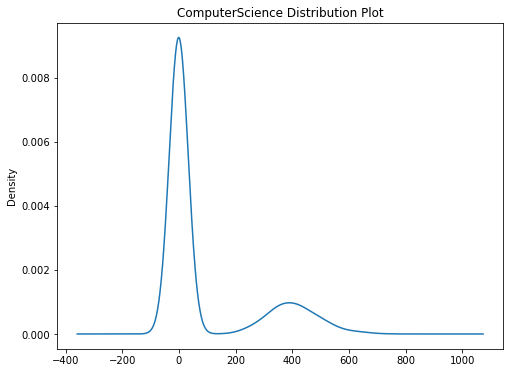

In [143]:
df.ComputerScience.plot(kind='kde', title="ComputerScience Distribution Plot", figsize=(8,6))
plt.show()

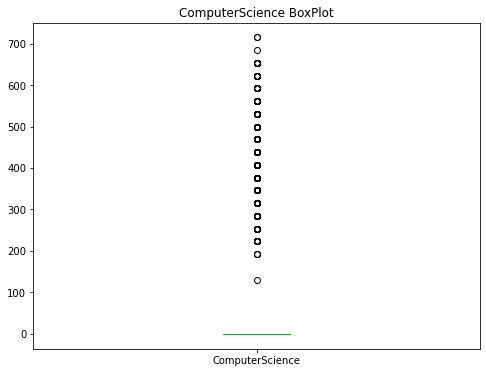

In [144]:
df.ComputerScience.plot(kind='box', title="ComputerScience BoxPlot", figsize=(8,6))
plt.show()

In [145]:
print("Minimum ComputerScience Score   : ", df['ComputerScience'].min())
print("Maximum ComputerScience Score   : ", df['ComputerScience'].max())
print("Mean ComputerScience Score      : ", round(df['ComputerScience'].mean()))
print("Median ComputerScience Score    : ", round(df['ComputerScience'].median()))
print("Standard ComputerScience Values : ", round(df['ComputerScience'].std()))

Minimum ComputerScience Score   :  -1
Maximum ComputerScience Score   :  715
Mean ComputerScience Score      :  91
Median ComputerScience Score    :  -1
Standard ComputerScience Values :  175


In [146]:
print("25 Percentile  : ",round(df['ComputerScience'].quantile(0.25)))
print("50 Percentile  : ",round(df['ComputerScience'].quantile(0.50)))
print("60 Percentile  : ",round(df['ComputerScience'].quantile(0.60)))
print("75 Percentile  : ",round(df['ComputerScience'].quantile(0.75)))
print("80 Percentile  : ",round(df['ComputerScience'].quantile(0.80)))
print("90 Percentile  : ",round(df['ComputerScience'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  -1
60 Percentile  :  -1
75 Percentile  :  -1
80 Percentile  :  315
90 Percentile  :  407


**(Score in AMCAT’s Computer Science section) ComputerScience Column Observations**

- Candidates Higest Scores in AMCAT Computer Science section is : 715
- Candidates Lowest Scores in AMCAT Computer Science section is : -1
- Candidates Average Scores in AMCAT Computer Science section is : -1
- ComputerScience Column have binormal distribution
- ComputerScience Column Have too many Outlier

### MechanicalEngg Column

In [147]:
df.MechanicalEngg

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7       469
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26      313
27       -1
28       -1
29       -1
30       -1
31       -1
32       -1
33       -1
34       -1
35       -1
36       -1
37       -1
38       -1
39       -1
40      286
41       -1
42       -1
43       -1
44       -1
45      253
46       -1
47       -1
48       -1
49       -1
50       -1
51       -1
52       -1
53       -1
54       -1
55       -1
56       -1
57       -1
58       -1
59      366
60       -1
61       -1
62       -1
63      446
64       -1
65       -1
66       -1
67       -1
68       -1
69       -1
70       -1
71       -1
72       -1
73       -1
74       -1
75       -1
76       -1
77       -1
78       -1
79       -1
80       -1
81       -1
82       -1
83  

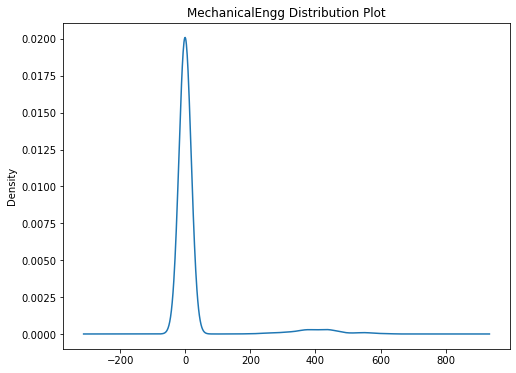

In [148]:
df.MechanicalEngg.plot(kind='kde', title="MechanicalEngg Distribution Plot", figsize=(8,6))
plt.show()

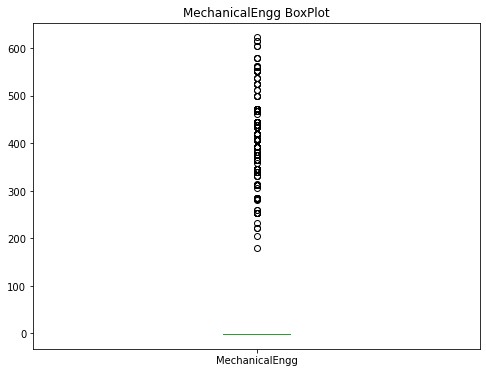

In [149]:
df.MechanicalEngg.plot(kind='box', title="MechanicalEngg BoxPlot", figsize=(8,6))
plt.show()

In [150]:
print("Minimum MechanicalEngg Score   : ", df['MechanicalEngg'].min())
print("Maximum MechanicalEngg Score   : ", df['MechanicalEngg'].max())
print("Mean MechanicalEngg Score      : ", round(df['MechanicalEngg'].mean()))
print("Median MechanicalEngg Score    : ", round(df['MechanicalEngg'].median()))
print("Standard MechanicalEngg Values : ", round(df['MechanicalEngg'].std()))

Minimum MechanicalEngg Score   :  -1
Maximum MechanicalEngg Score   :  623
Mean MechanicalEngg Score      :  23
Median MechanicalEngg Score    :  -1
Standard MechanicalEngg Values :  98


In [151]:
print("25 Percentile  : ",round(df['MechanicalEngg'].quantile(0.25)))
print("50 Percentile  : ",round(df['MechanicalEngg'].quantile(0.50)))
print("60 Percentile  : ",round(df['MechanicalEngg'].quantile(0.60)))
print("75 Percentile  : ",round(df['MechanicalEngg'].quantile(0.75)))
print("80 Percentile  : ",round(df['MechanicalEngg'].quantile(0.80)))
print("90 Percentile  : ",round(df['MechanicalEngg'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  -1
60 Percentile  :  -1
75 Percentile  :  -1
80 Percentile  :  -1
90 Percentile  :  -1


**(Score in AMCAT’s Mechanical Engineering section) MechanicalEngg Column Observations**

- Candidates Higest Score in AMCAT’s Mechanical Engineering section is : 623
- Candidates Lowest Score in AMCAT’s Mechanical Engineering section is : -1
- Candidates Average Score in AMCAT’s Mechanical Engineering section is : -1
- MechanicalEngg Column have skewed distribution
- MechanicalEngg Column Have too many Outlier

### ElectricalEngg Column

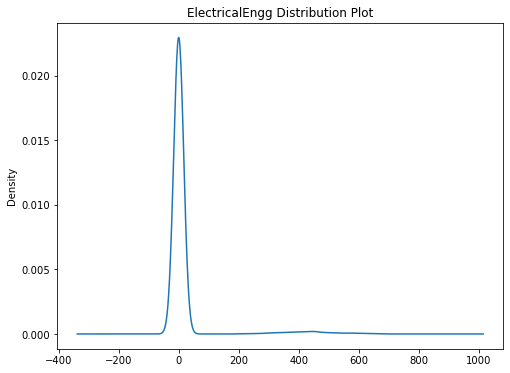

In [152]:
df.ElectricalEngg.plot(kind='kde', title="ElectricalEngg Distribution Plot", figsize=(8,6))
plt.show()

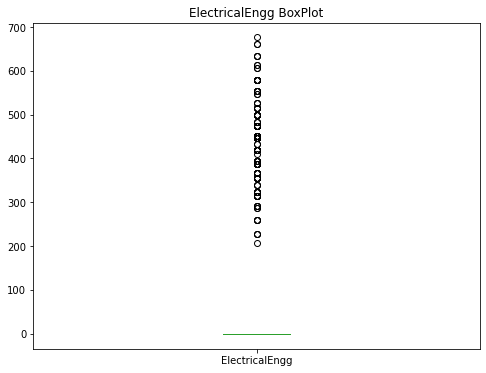

In [153]:
df.ElectricalEngg.plot(kind='box', title="ElectricalEngg BoxPlot", figsize=(8,6))
plt.show()

In [154]:
print("Minimum ElectricalEngg Score   : ", df['ElectricalEngg'].min())
print("Maximum ElectricalEngg Score   : ", df['ElectricalEngg'].max())
print("Mean ElectricalEngg Score      : ", round(df['ElectricalEngg'].mean()))
print("Median ElectricalEngg Score    : ", round(df['ElectricalEngg'].median()))
print("Standard ElectricalEngg Values : ", round(df['ElectricalEngg'].std()))

Minimum ElectricalEngg Score   :  -1
Maximum ElectricalEngg Score   :  676
Mean ElectricalEngg Score      :  16
Median ElectricalEngg Score    :  -1
Standard ElectricalEngg Values :  88


In [155]:
print("25 Percentile  : ",round(df['ElectricalEngg'].quantile(0.25)))
print("50 Percentile  : ",round(df['ElectricalEngg'].quantile(0.50)))
print("60 Percentile  : ",round(df['ElectricalEngg'].quantile(0.60)))
print("75 Percentile  : ",round(df['ElectricalEngg'].quantile(0.75)))
print("80 Percentile  : ",round(df['ElectricalEngg'].quantile(0.80)))
print("90 Percentile  : ",round(df['ElectricalEngg'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  -1
60 Percentile  :  -1
75 Percentile  :  -1
80 Percentile  :  -1
90 Percentile  :  -1


**(Score in AMCAT’s Electrical Engineering section) ElectricalEngg Column Observations**

- Candidates Higest Score in AMCAT’s Electrical Engineering section is : 676
- Candidates Lowest Score in AMCAT’s Electrical Engineering section is : -1
- Candidates Average Score in AMCAT’s Electrical Engineering section is : -1
- ElectricalEngg Column have left skewed distribution
- ElectricalEngg Column Have too many Outlier

### TelecomEngg Column

In [156]:
df.TelecomEngg

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12      206
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28      313
29       -1
30       -1
31       -1
32       -1
33       -1
34       -1
35       -1
36       -1
37       -1
38       -1
39       -1
40       -1
41       -1
42       -1
43       -1
44       -1
45       -1
46       -1
47       -1
48       -1
49       -1
50       -1
51       -1
52       -1
53       -1
54       -1
55       -1
56       -1
57      420
58       -1
59       -1
60       -1
61       -1
62      260
63       -1
64       -1
65       -1
66       -1
67       -1
68       -1
69       -1
70       -1
71       -1
72       -1
73       -1
74       -1
75       -1
76       -1
77       -1
78       -1
79       -1
80       -1
81      393
82       -1
83  

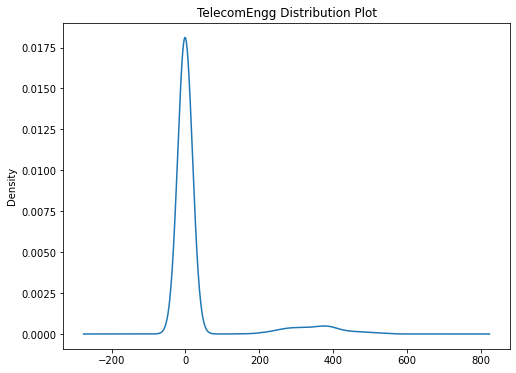

In [157]:
df.TelecomEngg.plot(kind='kde', title="TelecomEngg Distribution Plot", figsize=(8,6))
plt.show()

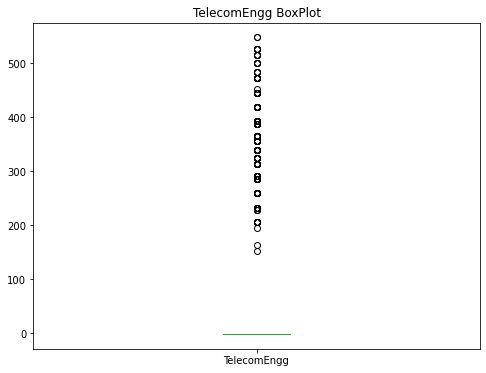

In [158]:
df.TelecomEngg.plot(kind='box', title="TelecomEngg BoxPlot", figsize=(8,6))
plt.show()

In [159]:
print("Minimum ElectricalEngg Score   : ", df['TelecomEngg'].min())
print("Maximum ElectricalEngg Score   : ", df['TelecomEngg'].max())
print("Mean ElectricalEngg Score      : ", round(df['TelecomEngg'].mean()))
print("Median ElectricalEngg Score    : ", round(df['TelecomEngg'].median()))
print("Standard ElectricalEngg Values : ", round(df['TelecomEngg'].std()))

Minimum ElectricalEngg Score   :  -1
Maximum ElectricalEngg Score   :  548
Mean ElectricalEngg Score      :  32
Median ElectricalEngg Score    :  -1
Standard ElectricalEngg Values :  105


In [160]:
print("25 Percentile  : ",round(df['TelecomEngg'].quantile(0.25)))
print("50 Percentile  : ",round(df['TelecomEngg'].quantile(0.50)))
print("60 Percentile  : ",round(df['TelecomEngg'].quantile(0.60)))
print("75 Percentile  : ",round(df['TelecomEngg'].quantile(0.75)))
print("80 Percentile  : ",round(df['TelecomEngg'].quantile(0.80)))
print("90 Percentile  : ",round(df['TelecomEngg'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  -1
60 Percentile  :  -1
75 Percentile  :  -1
80 Percentile  :  -1
90 Percentile  :  -1


**(Score in AMCAT’s Telecommunication Engineering section) TelecomEngg Column Observations**

- Candidates Higest Score in AMCAT’s Telecommunication Engineering section is : 548
- Candidates Lowest Score in AMCAT’s Telecommunication Engineering section is : -1
- Candidates Average Score in AMCAT’s Telecommunication Engineering section is : -1
- TelecomEngg Column have left skewed distribution
- TelecomEngg Column Have too many Outlier

### CivilEngg Column

In [161]:
df.CivilEngg

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26      320
27       -1
28       -1
29       -1
30       -1
31       -1
32       -1
33       -1
34       -1
35       -1
36       -1
37       -1
38       -1
39       -1
40       -1
41       -1
42       -1
43       -1
44       -1
45       -1
46       -1
47       -1
48       -1
49       -1
50       -1
51       -1
52       -1
53       -1
54       -1
55       -1
56       -1
57       -1
58       -1
59      400
60       -1
61       -1
62       -1
63       -1
64       -1
65       -1
66       -1
67       -1
68       -1
69       -1
70       -1
71       -1
72       -1
73       -1
74       -1
75       -1
76       -1
77       -1
78       -1
79       -1
80       -1
81       -1
82       -1
83  

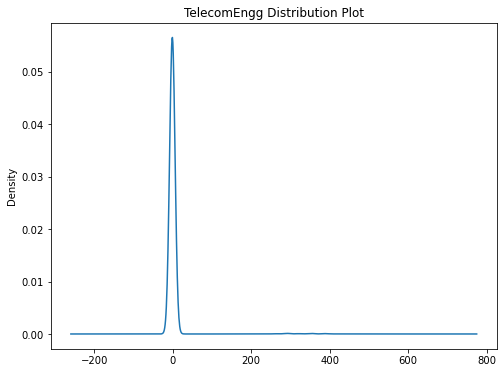

In [162]:
df.CivilEngg.plot(kind='kde', title="TelecomEngg Distribution Plot", figsize=(8,6))
plt.show()

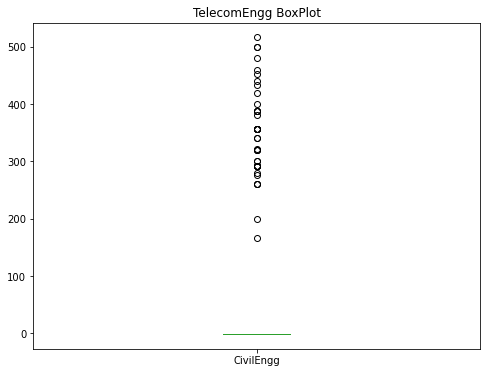

In [163]:
df.CivilEngg.plot(kind='box', title="TelecomEngg BoxPlot", figsize=(8,6))
plt.show()

In [164]:
print("Minimum CivilEngg Score   : ", df['CivilEngg'].min())
print("Maximum CivilEngg Score   : ", df['CivilEngg'].max())
print("Mean CivilEngg Score      : ", round(df['CivilEngg'].mean()))
print("Median CivilEngg Score    : ", round(df['CivilEngg'].median()))
print("Standard CivilEngg Values : ", round(df['CivilEngg'].std()))

Minimum CivilEngg Score   :  -1
Maximum CivilEngg Score   :  516
Mean CivilEngg Score      :  3
Median CivilEngg Score    :  -1
Standard CivilEngg Values :  37


In [165]:
print("25 Percentile  : ",round(df['CivilEngg'].quantile(0.25)))
print("50 Percentile  : ",round(df['CivilEngg'].quantile(0.50)))
print("60 Percentile  : ",round(df['CivilEngg'].quantile(0.60)))
print("75 Percentile  : ",round(df['CivilEngg'].quantile(0.75)))
print("80 Percentile  : ",round(df['CivilEngg'].quantile(0.80)))
print("90 Percentile  : ",round(df['CivilEngg'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  -1
60 Percentile  :  -1
75 Percentile  :  -1
80 Percentile  :  -1
90 Percentile  :  -1


**(Score in AMCAT’s Telecommunication Engineering section) TelecomEngg Column Observations**

- Candidates Higest Score in AMCAT’s Telecommunication Engineering section is : 516
- Candidates Lowest Score in AMCAT’s Telecommunication Engineering section is : -1
- Candidates Average Score in AMCAT’s Telecommunication Engineering section is : -1
- TelecomEngg Column have left skewed distribution
- TelecomEngg Column Have too many Outlier

### conscientiousness Column

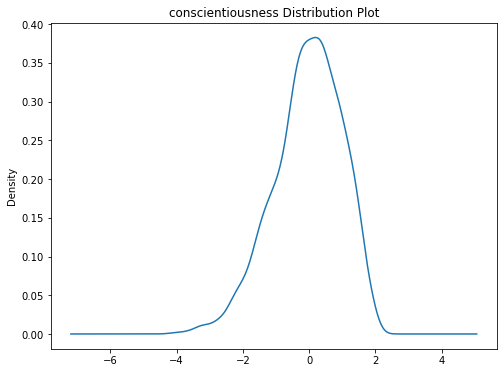

In [166]:
df.conscientiousness.plot(kind='kde', title="conscientiousness Distribution Plot", figsize=(8,6))
plt.show()

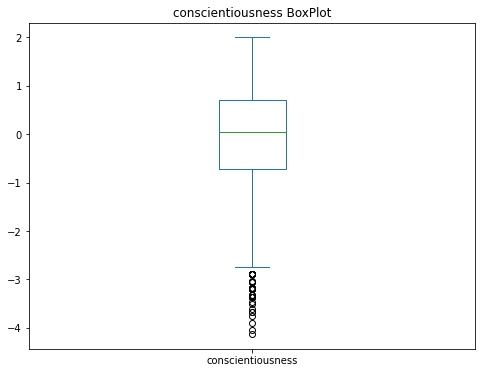

In [167]:
df.conscientiousness.plot(kind='box', title="conscientiousness BoxPlot", figsize=(8,6))
plt.show()

In [168]:
print("Minimum conscientiousness Score   : ", df['conscientiousness'].min())
print("Maximum conscientiousness Score   : ", df['conscientiousness'].max())
print("Mean conscientiousness Score      : ", round(df['conscientiousness'].mean()))
print("Median conscientiousness Score    : ", round(df['conscientiousness'].median()))
print("Standard conscientiousness Values : ", round(df['conscientiousness'].std()))

Minimum conscientiousness Score   :  -4.1267
Maximum conscientiousness Score   :  1.9953
Mean conscientiousness Score      :  0
Median conscientiousness Score    :  0
Standard conscientiousness Values :  1


In [169]:
print("25 Percentile  : ",round(df['conscientiousness'].quantile(0.25)))
print("50 Percentile  : ",round(df['conscientiousness'].quantile(0.50)))
print("60 Percentile  : ",round(df['conscientiousness'].quantile(0.60)))
print("75 Percentile  : ",round(df['conscientiousness'].quantile(0.75)))
print("80 Percentile  : ",round(df['conscientiousness'].quantile(0.80)))
print("90 Percentile  : ",round(df['conscientiousness'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  0
60 Percentile  :  0
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1


**(Scores in one of the sections of AMCAT’s personality test) conscientiousness Column Observations**

- Candidates Higest Score in AMCAT’s personality test is : 1.9
- Candidates Lowest Score in AMCAT’s personality test is : -4.12
- Candidates Average Score in AMCAT’s personality test is : 0
- conscientiousness Column have right skewed distribution
- conscientiousness Column Have too many Outlier

### agreeableness Column

In [170]:
df.agreeableness

0       0.8128
1       0.3789
2       1.7109
3       0.3448
4      -0.2793
5      -0.6201
6      -0.1054
7       1.2114
8       0.5454
9       0.5454
10      0.8128
11      1.1248
12      0.5454
13      0.0328
14      0.7119
15      1.9048
16      1.0449
17      1.0449
18      0.3789
19      0.2668
20      0.9688
21     -0.5913
22     -0.6201
23     -2.1186
24      0.8027
25      1.2028
26      0.1888
27      1.3779
28      0.7119
29     -1.8393
30      0.6568
31      1.2114
32     -0.4536
33      0.5454
34      1.0449
35     -0.5213
36      0.2124
37      0.5454
38      1.2114
39      1.2808
40      0.3448
41     -1.1196
42      0.2578
43     -2.4516
44      0.6568
45     -1.1196
46      0.5454
47      0.6568
48      0.0328
49      1.7488
50      0.0328
51     -0.1206
52      0.3789
53     -0.1206
54      0.0924
55      0.7119
56     -0.0842
57     -0.2793
58     -0.6201
59     -0.4353
60     -0.1206
61      1.5444
62     -0.9531
63     -2.6847
64      0.3448
65      1.2114
66     -0.

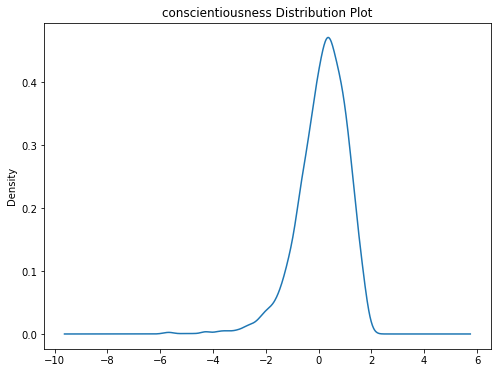

In [171]:
df.agreeableness.plot(kind='kde', title="conscientiousness Distribution Plot", figsize=(8,6))
plt.show()

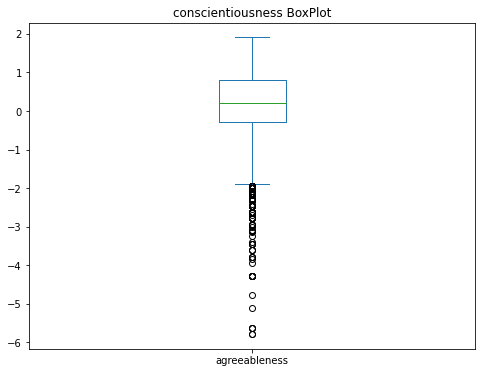

In [172]:
df.agreeableness.plot(kind='box', title="conscientiousness BoxPlot", figsize=(8,6))
plt.show()

In [173]:
print("Minimum agreeableness Score   : ", df['agreeableness'].min())
print("Maximum agreeableness Score   : ", df['agreeableness'].max())
print("Mean agreeableness Score      : ", round(df['agreeableness'].mean()))
print("Median agreeableness Score    : ", round(df['agreeableness'].median()))
print("Standard agreeableness Values : ", round(df['agreeableness'].std()))

Minimum agreeableness Score   :  -5.7816
Maximum agreeableness Score   :  1.9048
Mean agreeableness Score      :  0
Median agreeableness Score    :  0
Standard agreeableness Values :  1


In [174]:
print("25 Percentile  : ",round(df['agreeableness'].quantile(0.25)))
print("50 Percentile  : ",round(df['agreeableness'].quantile(0.50)))
print("60 Percentile  : ",round(df['agreeableness'].quantile(0.60)))
print("75 Percentile  : ",round(df['agreeableness'].quantile(0.75)))
print("80 Percentile  : ",round(df['agreeableness'].quantile(0.80)))
print("90 Percentile  : ",round(df['agreeableness'].quantile(0.90)))

25 Percentile  :  0
50 Percentile  :  0
60 Percentile  :  1
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1


**(Scores in one of the sections of AMCAT’s personality test) agreeableness Column Observations**

- Candidates Higest Score in AMCAT’s personality test is : 1.9
- Candidates Lowest Score in AMCAT’s personality test is : -5.78
- Candidates Average Score in AMCAT’s personality test is : 0
- agreeableness Column have right skewed distribution
- agreeableness Column Have too many Outlier

### extraversion Column

In [175]:
df.extraversion

0       0.5269
1       1.2396
2       0.1637
3      -0.3440
4      -1.0697
5      -2.2954
6      -1.0379
7       0.0100
8      -0.6048
9      -0.9122
10      0.0914
11      0.8171
12     -0.7585
13     -0.5980
14      0.0100
15      0.6720
16      0.7785
17     -1.0659
18      1.3933
19     -0.2714
20      0.5269
21     -1.3599
22     -0.6048
23     -1.9881
24      0.1357
25     -0.9245
26     -1.7954
27      0.7785
28      1.3933
29      0.0552
30     -0.0537
31      1.0859
32     -1.0659
33     -0.7585
34      0.3174
35      2.1129
36      0.4711
37      0.3174
38      0.6248
39      0.2366
40      0.0914
41     -1.0659
42     -0.5349
43     -0.4511
44     -0.6343
45      0.4711
46      0.1637
47     -0.7794
48      0.3817
49      1.8331
50     -2.2308
51     -1.0659
52      1.0859
53     -0.6048
54     -0.6582
55     -0.2974
56     -0.5980
57     -0.6343
58     -0.2974
59     -0.9245
60      0.1637
61      0.3174
62      0.0100
63     -2.6028
64      0.8171
65     -0.2974
66      0.

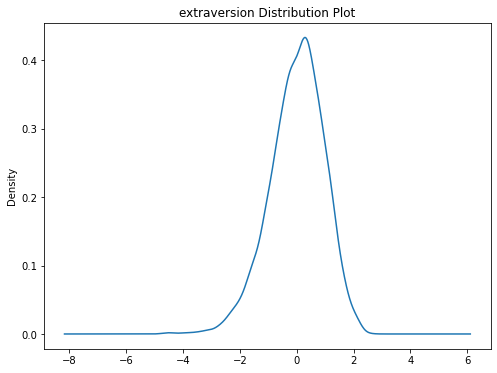

In [176]:
df.extraversion.plot(kind='kde', title="extraversion Distribution Plot", figsize=(8,6))
plt.show()

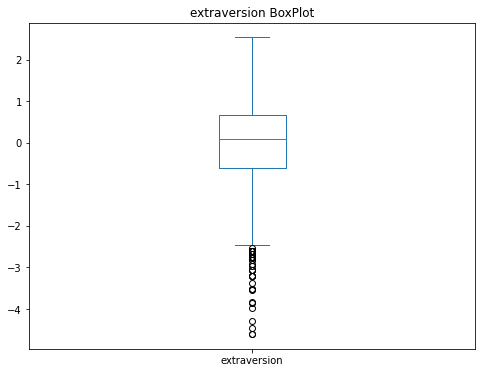

In [177]:
df.extraversion.plot(kind='box', title="extraversion BoxPlot", figsize=(8,6))
plt.show()

In [178]:
print("Minimum extraversion Score   : ", df['extraversion'].min())
print("Maximum extraversion Score   : ", df['extraversion'].max())
print("Mean extraversion Score      : ", round(df['extraversion'].mean()))
print("Median extraversion Score    : ", round(df['extraversion'].median()))
print("Standard extraversion Values : ", round(df['extraversion'].std()))

Minimum extraversion Score   :  -4.6009
Maximum extraversion Score   :  2.5354
Mean extraversion Score      :  0
Median extraversion Score    :  0
Standard extraversion Values :  1


In [179]:
print("25 Percentile  : ",round(df['extraversion'].quantile(0.25)))
print("50 Percentile  : ",round(df['extraversion'].quantile(0.50)))
print("60 Percentile  : ",round(df['extraversion'].quantile(0.60)))
print("75 Percentile  : ",round(df['extraversion'].quantile(0.75)))
print("80 Percentile  : ",round(df['extraversion'].quantile(0.80)))
print("90 Percentile  : ",round(df['extraversion'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  0
60 Percentile  :  0
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1


**(Scores in one of the sections of AMCAT’s personality test) extraversion Column Observations**

- Candidates Higest Score in AMCAT’s personality test is : 2.53
- Candidates Lowest Score in AMCAT’s personality test is : -4.60
- Candidates Average Score in AMCAT’s personality test is : 0
- extraversion Column have right skewed distribution
- extraversion Column Have too many Outlier

### nueroticism Column

In [180]:
df.nueroticism

0       1.35490
1      -0.10760
2      -0.86820
3      -0.40780
4       0.09163
5      -0.74150
6      -2.00920
7       0.14590
8      -0.74150
9       0.90660
10      0.17980
11     -0.40780
12     -0.99500
13     -0.29020
14     -0.99500
15     -0.29020
16     -0.61470
17     -1.62890
18     -0.23440
19     -0.40780
20     -0.29020
21      0.06223
22      0.77980
23     -0.48790
24     -0.99500
25      0.53230
26      1.82490
27     -0.23440
28     -0.36120
29      0.06230
30     -1.23030
31     -1.50210
32      1.16010
33     -0.61470
34     -1.88240
35     -0.73500
36      0.27270
37     -1.88240
38      0.77980
39     -2.19980
40     -0.40780
41     -1.24860
42     -1.12180
43      0.27270
44      0.29730
45     -0.74150
46     -0.48790
47      1.70740
48      0.26793
49     -2.28790
50      1.00240
51     -0.10760
52      0.65300
53     -1.62890
54     -0.48210
55      1.16010
56     -0.64280
57     -0.29020
58     -0.10760
59     -0.34900
60      1.54040
61      0.39950
62     -

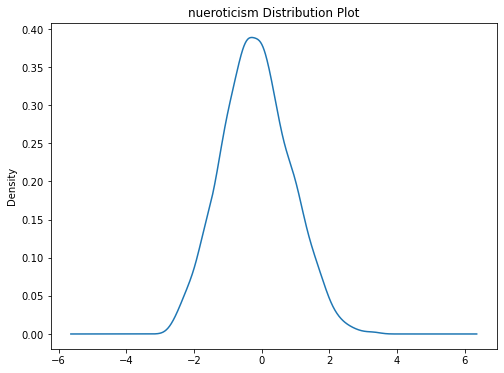

In [181]:
df.nueroticism.plot(kind='kde', title="nueroticism Distribution Plot", figsize=(8,6))
plt.show()

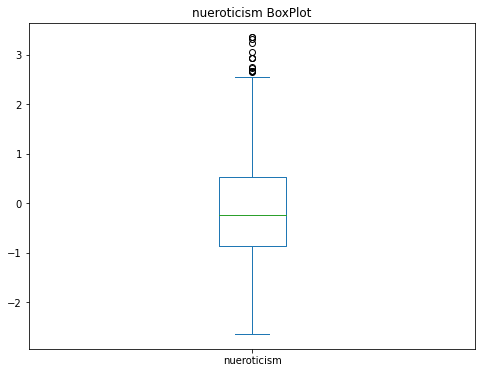

In [182]:
df.nueroticism.plot(kind='box', title="nueroticism BoxPlot", figsize=(8,6))
plt.show()

In [183]:
print("Minimum nueroticism Score   : ", df['nueroticism'].min())
print("Maximum nueroticism Score   : ", df['nueroticism'].max())
print("Mean nueroticism Score      : ", round(df['nueroticism'].mean()))
print("Median nueroticism Score    : ", round(df['nueroticism'].median()))
print("Standard nueroticism Values : ", round(df['nueroticism'].std()))

Minimum nueroticism Score   :  -2.643
Maximum nueroticism Score   :  3.3525
Mean nueroticism Score      :  0
Median nueroticism Score    :  0
Standard nueroticism Values :  1


In [184]:
print("25 Percentile  : ",round(df['nueroticism'].quantile(0.25)))
print("50 Percentile  : ",round(df['nueroticism'].quantile(0.50)))
print("60 Percentile  : ",round(df['nueroticism'].quantile(0.60)))
print("75 Percentile  : ",round(df['nueroticism'].quantile(0.75)))
print("80 Percentile  : ",round(df['nueroticism'].quantile(0.80)))
print("90 Percentile  : ",round(df['nueroticism'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  0
60 Percentile  :  0
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1


**(Scores in one of the sections of AMCAT’s personality test) nueroticism Column Observations**

- Candidates Higest Score in AMCAT’s personality test is : 3.35
- Candidates Lowest Score in AMCAT’s personality test is : -2.64
- Candidates Average Score in AMCAT’s personality test is : 0
- nueroticism Column have right skewed distribution
- nueroticism Column Have too many Outlier

### openess_to_experience Column

In [185]:
df.openess_to_experience

0      -0.4455
1       0.8637
2       0.6721
3      -0.9194
4      -0.1295
5      -0.8608
6      -1.0872
7       1.2470
8      -0.2859
9       0.0973
10      0.0284
11     -0.4455
12      0.8637
13     -1.2354
14      0.6721
15      1.2528
16     -0.8608
17      0.6721
18      1.4386
19     -0.1295
20      0.3444
21     -1.3539
22     -2.7769
23     -5.0763
24     -0.6692
25     -0.2875
26      1.1343
27     -0.6692
28     -0.0943
29     -0.7615
30     -0.9194
31      0.2889
32     -0.4776
33      1.4386
34      1.0554
35      1.8224
36     -0.0943
37     -0.4776
38      0.8637
39     -0.4455
40      0.6603
41     -1.4356
42     -1.3590
43     -3.1602
44      0.1864
45     -1.4356
46      0.8637
47      0.1864
48      0.5024
49      1.1343
50      0.3444
51     -1.2440
52      0.2889
53     -1.4356
54     -0.1543
55     -0.4776
56     -0.6035
57     -0.2875
58     -1.2440
59     -0.4455
60     -0.0943
61      0.6721
62     -0.8608
63     -5.4770
64      0.0284
65      1.2470
66     -0.

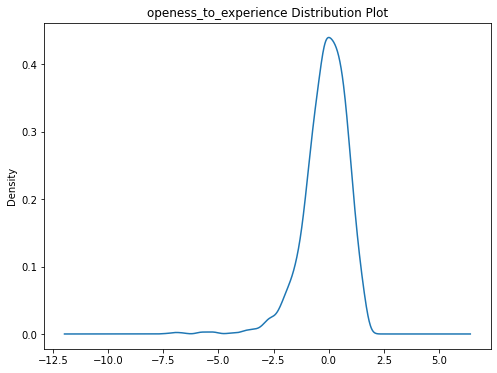

In [186]:
df.openess_to_experience.plot(kind='kde', title="openess_to_experience Distribution Plot", figsize=(8,6))
plt.show()

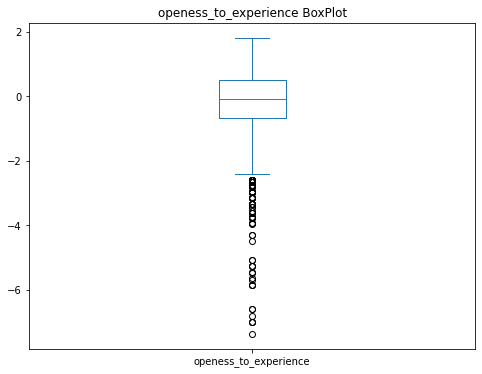

In [187]:
df.openess_to_experience.plot(kind='box', title="openess_to_experience BoxPlot", figsize=(8,6))
plt.show()

In [188]:
print("Minimum openess_to_experience Score   : ", df['openess_to_experience'].min())
print("Maximum openess_to_experience Score   : ", df['openess_to_experience'].max())
print("Mean openess_to_experience Score      : ", round(df['openess_to_experience'].mean()))
print("Median openess_to_experience Score    : ", round(df['openess_to_experience'].median()))
print("Standard openess_to_experience Values : ", round(df['openess_to_experience'].std()))

Minimum openess_to_experience Score   :  -7.3757
Maximum openess_to_experience Score   :  1.8224
Mean openess_to_experience Score      :  0
Median openess_to_experience Score    :  0
Standard openess_to_experience Values :  1


In [189]:
print("25 Percentile  : ",round(df['openess_to_experience'].quantile(0.25)))
print("50 Percentile  : ",round(df['openess_to_experience'].quantile(0.50)))
print("60 Percentile  : ",round(df['openess_to_experience'].quantile(0.60)))
print("75 Percentile  : ",round(df['openess_to_experience'].quantile(0.75)))
print("80 Percentile  : ",round(df['openess_to_experience'].quantile(0.80)))
print("90 Percentile  : ",round(df['openess_to_experience'].quantile(0.90)))

25 Percentile  :  -1
50 Percentile  :  0
60 Percentile  :  0
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1


**(Scores in one of the sections of AMCAT’s personality test) openess_to_experience Column Observations**

- Candidates Higest Score in AMCAT’s personality test is : 1.8
- Candidates Lowest Score in AMCAT’s personality test is :  -7.37
- Candidates Average Score in AMCAT’s personality test is : 0
- openess_to_experience Column have right skewed distribution
- openess_to_experience Column Have too many Outlier

In [190]:
cleaned_data = df.copy()

In [191]:
# Removing Unnesscary columns

df.drop(columns=['10percentage','10board','12graduation','12percentage','12board','CollegeCityTier',
                 'English','Logical','Quant','Domain','ComputerProgramming', 'DOJ','DOL','DOB',
                 'ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg',
                 'TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion',
                 'nueroticism','openess_to_experience'], inplace=True)

In [192]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeState', 'GraduationYear', 'YOJ',
       'MOJ', 'YOL', 'Age'],
      dtype='object')

## Bivariate Analysis

Bivariate analysis is a statistical technique used to analyze the relationship between two variables. It helps determine whether there is an association or relationship between the two variables and measures the strength and direction of that relationship. The methods of bivariate analysis include correlation analysis, regression analysis, and chi-square analysis, among others. Bivariate analysis is used in various fields and can help researchers understand the relationship between variables to make informed decisions and predictions.

In [193]:
df.head()

Salary Designation    JobCity  Gender  CollegeTier       Degree  \
0   420000      others  Bangalore  Female            2  B.Tech/B.E.   
1   500000     manager     Indore    Male            2  B.Tech/B.E.   
2   325000    engineer    chennai  Female            2  B.Tech/B.E.   
3  1100000      others    Gurgaon    Male            1  B.Tech/B.E.   
4   200000      others     Others    Male            2  B.Tech/B.E.   

  Specialization  collegeGPA    CollegeState  GraduationYear   YOJ        MOJ  \
0      computers       78.00  Andhra Pradesh            2011  2012       June   
1           etrx       70.06  Madhya Pradesh            2012  2013  September   
2      computers       70.00   Uttar Pradesh            2014  2014       June   
3      computers       74.64           Delhi            2011  2011       July   
4           etrx       73.90   Uttar Pradesh            2012  2014      March   

    YOL  Age  
0  2015   25  
1  2015   26  
2  2015   23  
3  2015   26  
4  2015   24

**Designation VS Salary**

<Figure size 648x432 with 0 Axes>

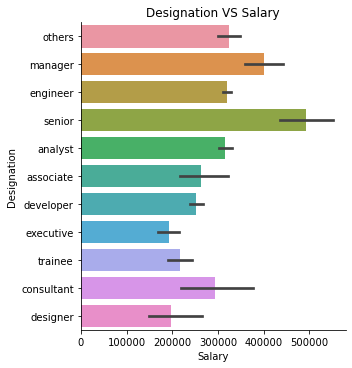

In [194]:
plt.figure(figsize=(9,6))
sns.catplot(y="Designation", x="Salary", kind="bar", data=df)
plt.title("Designation VS Salary")
plt.show()

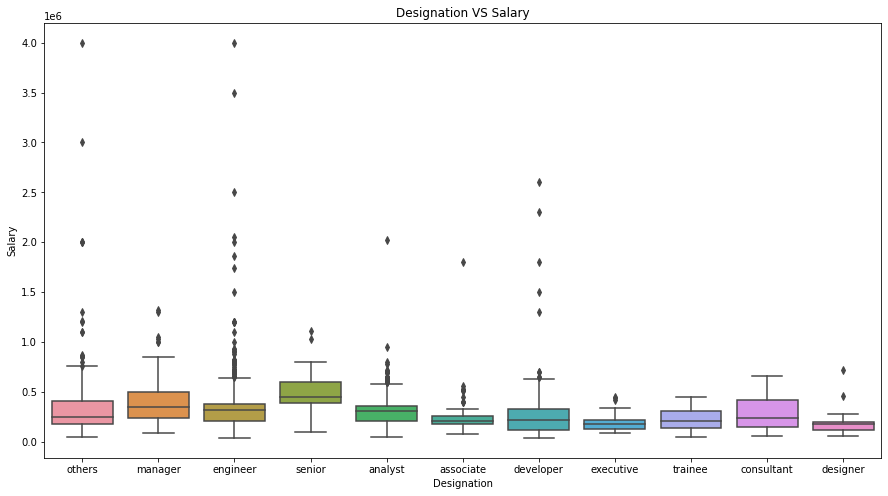

In [195]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Designation", y="Salary", data=df)
plt.title("Designation VS Salary")
plt.show()

**Designation VS Salary Column Observations**

- Senior Candidates and Managers an average have earn more in compare to Others.

**JobCity VS Salary**

<Figure size 648x432 with 0 Axes>

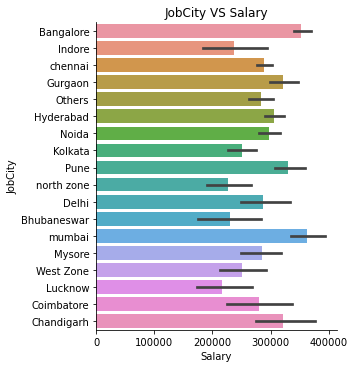

In [196]:
plt.figure(figsize=(9,6))
sns.catplot(y="JobCity", x="Salary", kind="bar", data=df)
plt.title("JobCity VS Salary")
plt.show()

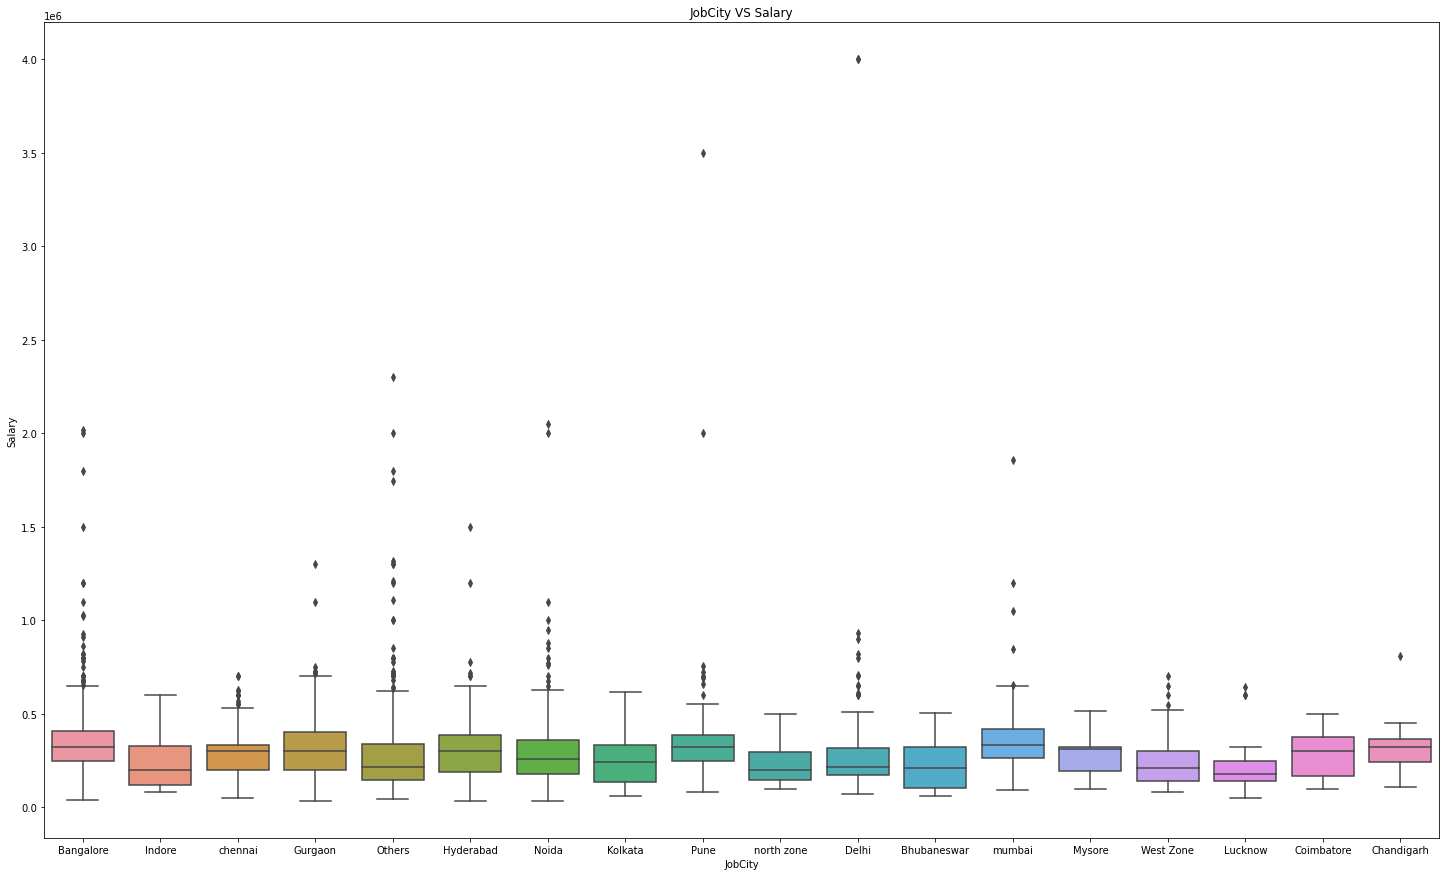

In [197]:
plt.figure(figsize=(25,15))
sns.boxplot(x="JobCity", y="Salary", data=df)
plt.title("JobCity VS Salary")
plt.show()

**JobCity VS Salary Column Observations**

- Candidates who are come from Mumbai and Bangalore an average have earn more in compare to Others States.

**Gender VS Salary**

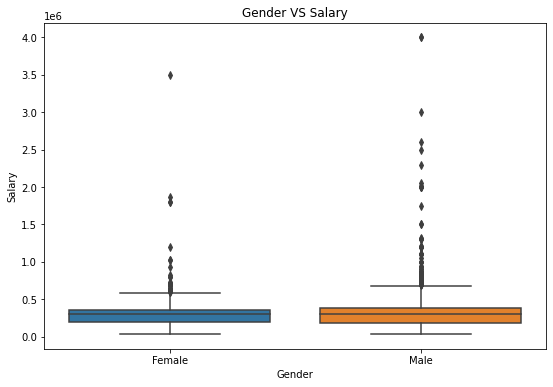

In [198]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Gender", y="Salary", data=df)
plt.title("Gender VS Salary")
plt.show()

**Gender VS Salary Column Observations**

- Male Candidates are earn more in compare to female.

**CollegeTier VS Salary**

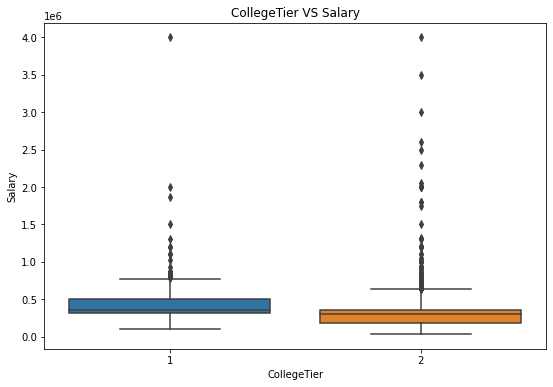

In [199]:
plt.figure(figsize=(9,6))
sns.boxplot(x="CollegeTier", y="Salary", data=df)
plt.title("CollegeTier VS Salary")
plt.show()

<Figure size 648x432 with 0 Axes>

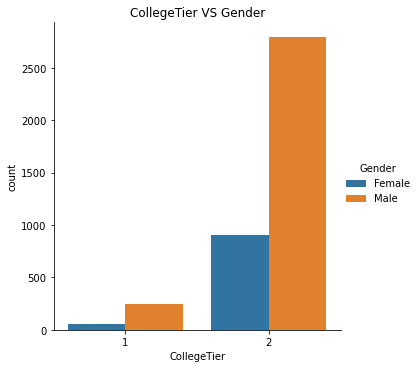

In [200]:
plt.figure(figsize=(9,6))
sns.catplot(x="CollegeTier", hue="Gender", kind="count", data=df)
plt.title("CollegeTier VS Gender")
plt.show()

**CollegeTier VS Salary VS Gender Column Observations**

- Tier 2 Colleges Candidates are earn more in compare to Tier 1 College.

**Degree VS Salary**

<Figure size 648x432 with 0 Axes>

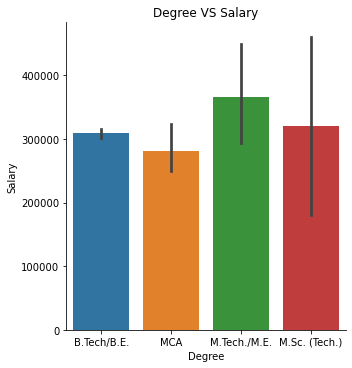

In [201]:
plt.figure(figsize=(9,6))
sns.catplot(x="Degree", y="Salary", kind="bar", data=df)
plt.title("Degree VS Salary")
plt.show()

**Degree VS Salary Column Observations**

- Tier 2 Colleges Candidates are earn more in compare to Tier 1 College.
- M.Tech./M.E. Graduates Candidates are earn more in compare to Others Graduates.

**Specialization VS Salary**

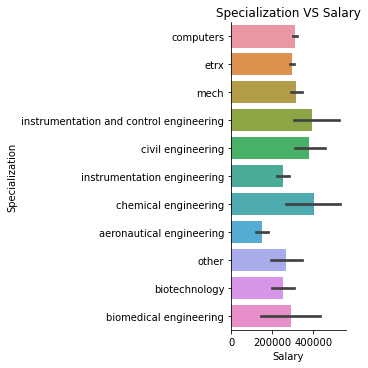

In [202]:
sns.catplot(y="Specialization", x="Salary", kind="bar", data=df)
plt.title("Specialization VS Salary")
plt.show()

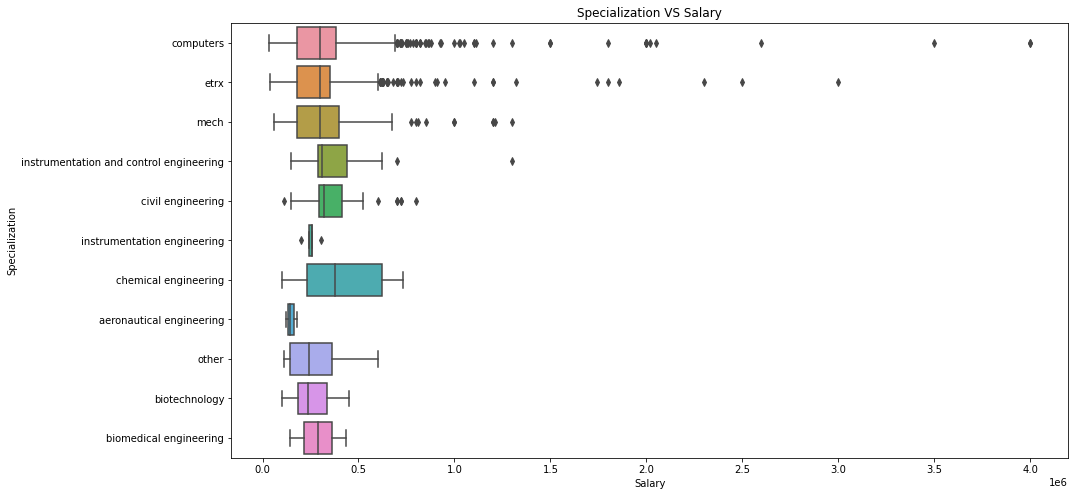

In [203]:
plt.figure(figsize=(15,8))
sns.boxplot(y="Specialization", x="Salary", data=df)
plt.title("Specialization VS Salary")
plt.show()

**Specialization VS Salary Column Observations**

- Computers Specialization Candidates are earn more in compare to Other Specialization.

**collegeGPA VS Salary**

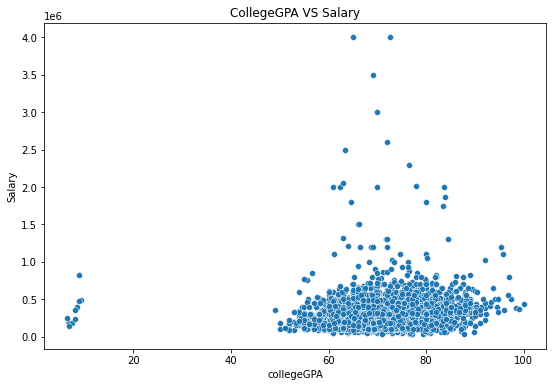

In [204]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='collegeGPA', y='Salary')
plt.title("CollegeGPA VS Salary")
plt.show()

**collegeGPA VS Salary Column Observations**

- Highest collegeGPA Candidates are earn more in compare to Other Candidates.

**CollegeState VS Salary**

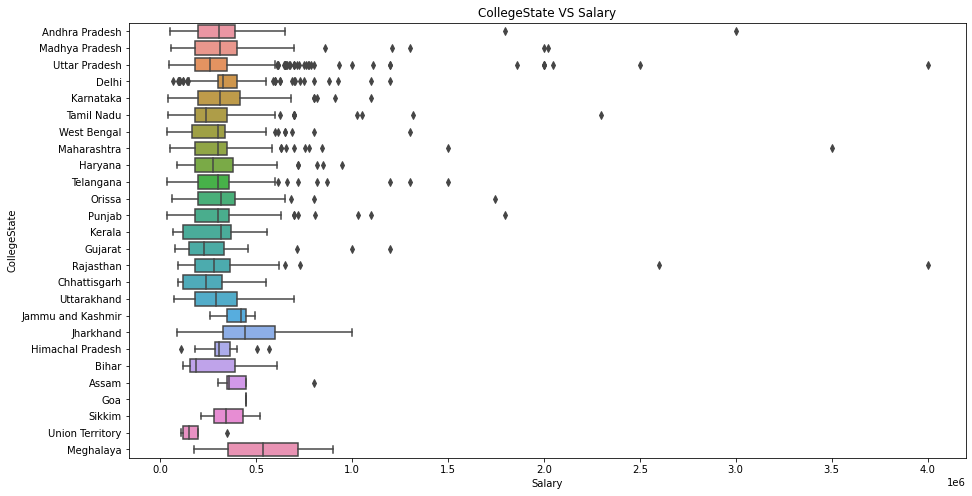

In [205]:
plt.figure(figsize=(15,8))
sns.boxplot(y="CollegeState", x="Salary", data=df)
plt.title("CollegeState VS Salary")
plt.show()

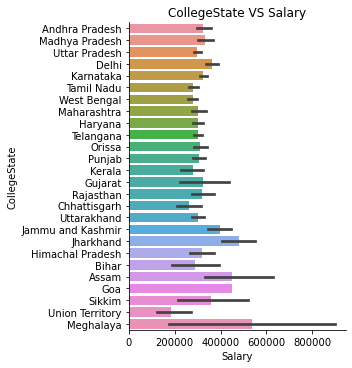

In [206]:
sns.catplot(y="CollegeState", x="Salary", kind="bar", data=df)
plt.title("CollegeState VS Salary")
plt.show()

**CollegeState VS Salary Column Observations**

- Meghalian Candidates are earn more in compare to Other States Candidates.

**GraduationYear VS Salary**

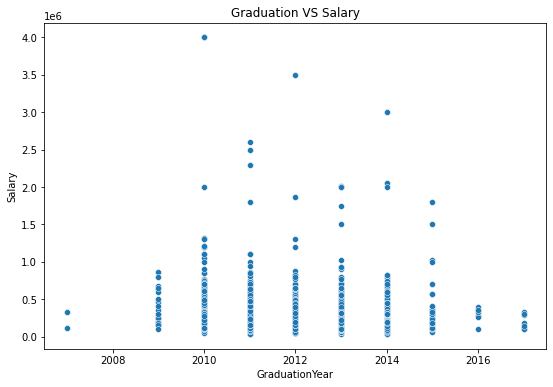

In [207]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='GraduationYear', y='Salary')
plt.title("Graduation VS Salary")
plt.show()

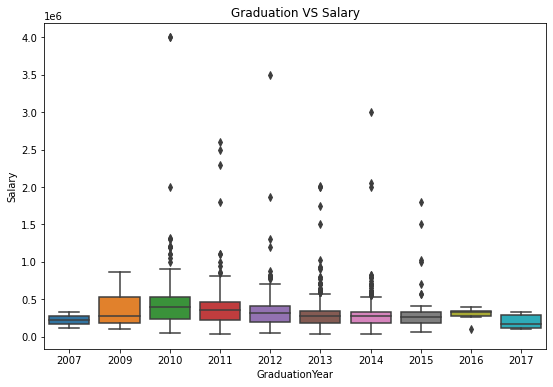

In [208]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x='GraduationYear', y='Salary')
plt.title("Graduation VS Salary")
plt.show()

**GraduationYear VS Salary Column Observations**

- 2010 Graduate Candidates on average are earn more in compare to Other Candidates.

## Research Questions

- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

- Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

In [214]:
df.head()

Salary Designation    JobCity  Gender  CollegeTier       Degree  \
0   420000      others  Bangalore  Female            2  B.Tech/B.E.   
1   500000     manager     Indore    Male            2  B.Tech/B.E.   
2   325000    engineer    chennai  Female            2  B.Tech/B.E.   
3  1100000      others    Gurgaon    Male            1  B.Tech/B.E.   
4   200000      others     Others    Male            2  B.Tech/B.E.   

  Specialization  collegeGPA    CollegeState  GraduationYear   YOJ        MOJ  \
0      computers       78.00  Andhra Pradesh            2011  2012       June   
1           etrx       70.06  Madhya Pradesh            2012  2013  September   
2      computers       70.00   Uttar Pradesh            2014  2014       June   
3      computers       74.64           Delhi            2011  2011       July   
4           etrx       73.90   Uttar Pradesh            2012  2014      March   

    YOL  Age  
0  2015   25  
1  2015   26  
2  2015   23  
3  2015   26  
4  2015   24

In [218]:
df.Designation.value_counts()

engineer      1997
developer      668
others         538
analyst        402
manager        123
associate       66
executive       62
trainee         57
senior          43
designer        23
consultant      19
Name: Designation, dtype: int64

In [219]:
# group by job title and calculate average salary

salary_by_title = df.groupby('Designation')['Salary'].mean()

# print the result

salary_by_title

Designation
analyst       316293.532338
associate     262196.969697
consultant    293947.368421
designer      197391.304348
developer     251669.161677
engineer      319658.988483
executive     192016.129032
manager       400894.308943
others        324098.513011
senior        491744.186047
trainee       217631.578947
Name: Salary, dtype: float64

In [220]:
# group by job title and calculate average salary

salary_by_title = df1.groupby('Designation')['Salary'].mean()

# print the result

salary_by_title

Designation
.net developer                            2.233824e+05
.net web developer                        1.962500e+05
account executive                         2.875000e+05
account manager                           3.500000e+05
admin assistant                           1.025000e+05
administrative coordinator                1.900000e+05
administrative support                    2.000000e+05
aircraft technician                       1.000000e+05
android developer                         2.007609e+05
application developer                     4.190385e+05
application engineer                      2.781818e+05
apprentice                                8.666667e+04
ase                                       3.400000e+05
asp.net developer                         2.082692e+05
assistant administrator                   3.400000e+05
assistant electrical engineer             2.100000e+05
assistant engineer                        3.100000e+05
assistant manager                         4.426923e+0

### Research Question No : 1

After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate. Test this claim with the data given to you.

In [231]:
# Grouping the data by Designation and Specialization and calculating the average salary for each group

grouped_df = rq.groupby(['Designation', 'Specialization']).agg({'Salary': 'mean'}).reset_index()

# Checking if the average salaries are within the range of 2.5-3 lakhs

lower_bound = 250000
upper_bound = 300000
result = (rq['Salary'] >= lower_bound) & (rq['Salary'] <= upper_bound)

if result.all():
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")

The claim is not supported by the data.


In [232]:
grouped_df

Designation                  Specialization  \
0              associate engineer  computer science & engineering   
1              programmer analyst  computer science & engineering   
2      programmer analyst trainee  computer science & engineering   
3     software engineer associate  computer science & engineering   
4       software engineer trainee  computer science & engineering   
5  software engineering associate  computer science & engineering   

         Salary  
0  3.325000e+05  
1  3.238462e+05  
2  3.150000e+05  
3  3.000000e+05  
4  2.050000e+06  
5  3.900000e+05

### Research Question No : 2

Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

<Figure size 648x432 with 0 Axes>

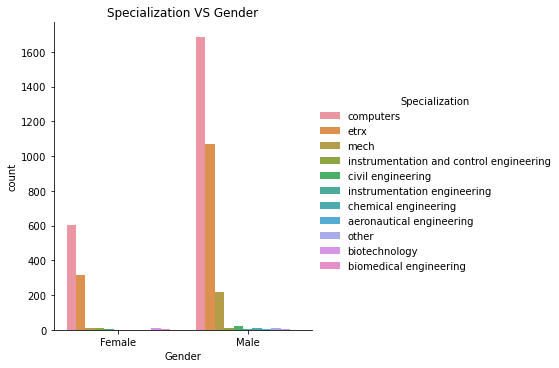

In [233]:
plt.figure(figsize=(9,6))
sns.catplot(x="Gender", hue="Specialization", kind="count", data=df)
plt.title("Specialization VS Gender")
plt.show()

In [234]:
# Calculating the frequency distribution of each specialization based on gender

freq_table = pd.crosstab(df['Gender'], df['Specialization'], margins=True)

# Normalizing the frequency table to get the proportions

freq_table.div(freq_table['All'], axis=0)

Specialization  aeronautical engineering  biomedical engineering  \
Gender                                                             
Female                          0.001045                 0.00209   
Male                            0.000658                 0.00000   
All                             0.000750                 0.00050   

Specialization  biotechnology  chemical engineering  civil engineering  \
Gender                                                                   
Female               0.009404              0.001045           0.006270   
Male                 0.001973              0.002960           0.007563   
All                  0.003752              0.002501           0.007254   

Specialization  computers      etrx  instrumentation and control engineering  \
Gender                                                                         
Female           0.630094  0.327064                                 0.009404   
Male             0.554094  0.351858                                 0.003617   
All              0.572286  0.345923                                 0.005003   

Specialization  instrumentation engineering      mech     other  All  
Gender                                                                
Female                             0.000000  0.013584  0.000000  1.0  
Male                               0.001644  0.071358  0.004275  1.0  
All                                0.001251  0.057529  0.003252  1.0

**Research Question No : 2 Observation**


- The most popular specializations for both males and females are Computer Science and Electronics and Telecommunications (ETRX), which make up more than 60% and 55% of their respective proportions.

- The proportion of females in Aeronautical Engineering, Biomedical Engineering, and Biotechnology is higher than the proportion of males in these fields.

- The proportion of males in Chemical Engineering, Civil Engineering, and Mechanical Engineering is higher than the proportion of females in these fields.

- Other specializations have a higher proportion of males than females.